<a href="https://colab.research.google.com/github/shmanik14/Heart/blob/main/Heart_Disease_Prediction_n_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Topic (Heart Disease Diagnosis And Prediction Using Ensemble learning Algorithms)
## Project description
**In this project a dataset containing various heart disease abnomalities of patients, along with a variable that indicates if a patient has heart disease or not was used. The aim is to create an accurate machine learning algorithm for predicting heart disease**

In [3]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier,VotingClassifier
import xgboost as xgb
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score,GridSearchCV,KFold
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.7 MB/s eta 0:00:00


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
#import the data
# Read the text file into a Pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/dataset/heart.csv')

In [6]:
#show the first five rows
data.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [7]:
#display data dimension
data.shape

(246022, 40)

In [8]:
#check for missing values
data.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [9]:
#check if there are duplicate observations
data.duplicated().sum()

9

In [10]:
data.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

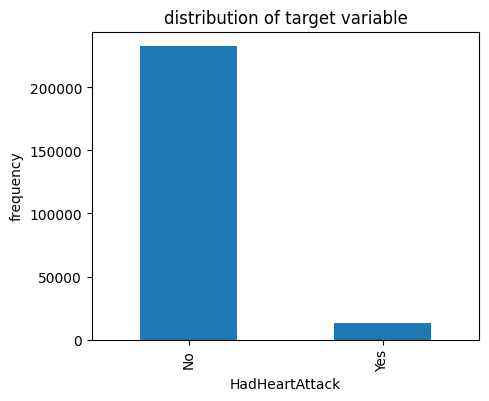

In [11]:
#check the distribution of target variable to know if the targets are balanced or not
plt.figure(figsize=[5,4])
data['HadHeartAttack'].value_counts().plot(kind='bar')
plt.title('distribution of target variable')
plt.ylabel('frequency');

In [12]:
#check the data types
data.dtypes

State                         object
Sex                           object
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               object
PhysicalActivities            object
SleepHours                   float64
RemovedTeeth                  object
HadHeartAttack                object
HadAngina                     object
HadStroke                     object
HadAsthma                     object
HadSkinCancer                 object
HadCOPD                       object
HadDepressiveDisorder         object
HadKidneyDisease              object
HadArthritis                  object
HadDiabetes                   object
DeafOrHardOfHearing           object
BlindOrVisionDifficulty       object
DifficultyConcentrating       object
DifficultyWalking             object
DifficultyDressingBathing     object
DifficultyErrands             object
SmokerStatus                  object
ECigaretteUsage               object
C

In [13]:
#display the first five rows
data.tail()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
246017,Virgin Islands,Male,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.78,102.06,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
246018,Virgin Islands,Female,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.93,90.72,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
246019,Virgin Islands,Male,Good,0.0,15.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.68,83.91,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
246020,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
246021,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,Yes,...,1.83,108.86,32.55,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


In [14]:
#show the descriptive statistics
data.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,7.021331,1.705150,83.615179,28.668136
std,8.405844,8.102687,1.440681,0.106654,21.323156,6.513973
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


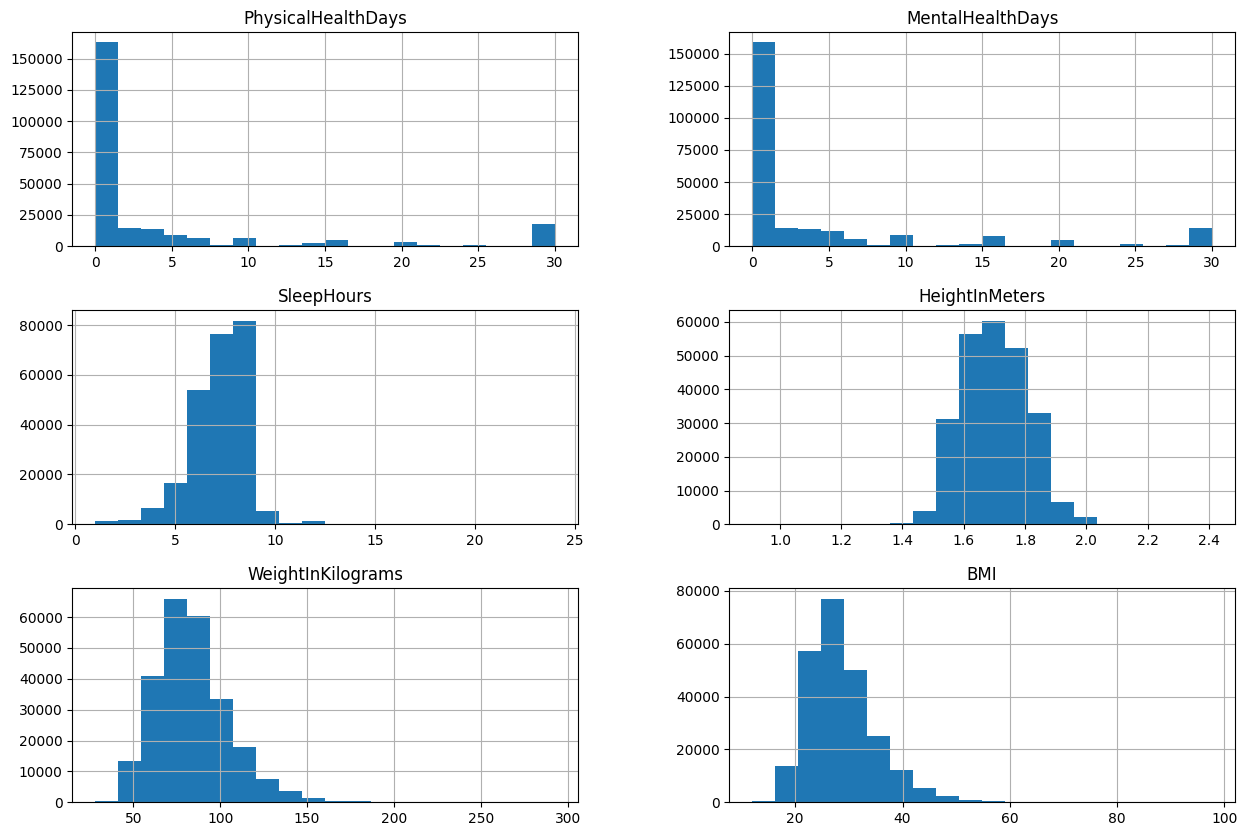

In [15]:
#create histogram plots to see the distribution of different numerical variables
columns= ['PhysicalHealthDays','MentalHealthDays','SleepHours','HeightInMeters','WeightInKilograms','BMI']


data[columns].hist( bins=20, figsize=(15,10))
plt.savefig('charts_1.png');

In [16]:
data.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

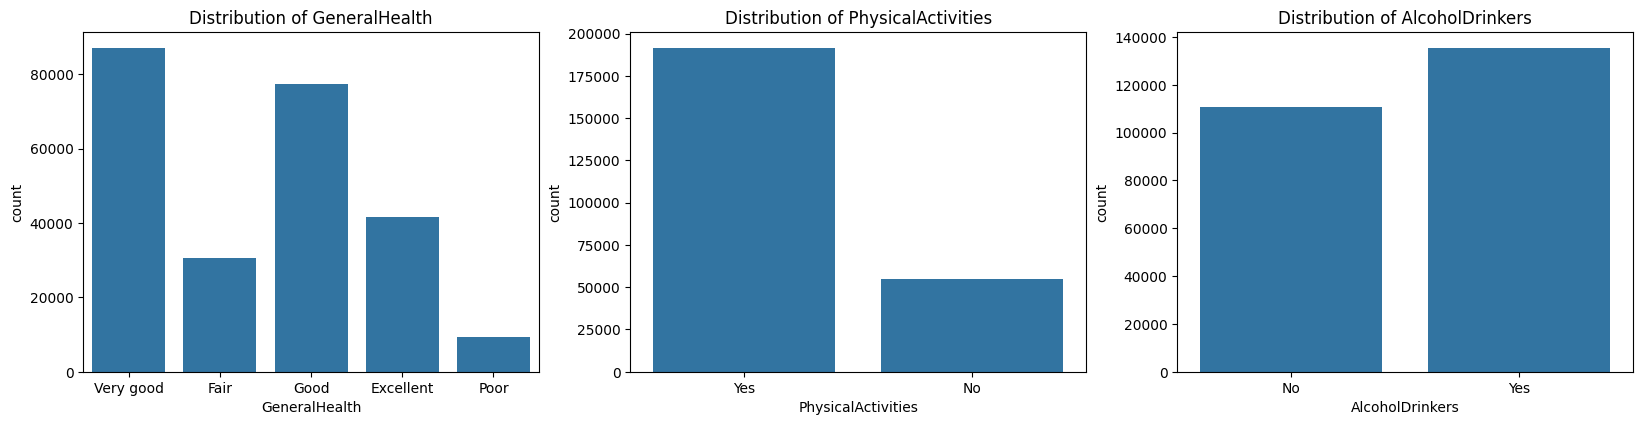

In [17]:
#create count plots to see the counts of each type of chest pain and Thal
categories= ['GeneralHealth', 'PhysicalActivities', 'AlcoholDrinkers']

plt.rcParams["figure.figsize"] = (20,15)
for idx, x in enumerate(['GeneralHealth', 'PhysicalActivities', 'AlcoholDrinkers']):
    plt.subplot(3 , 3 , idx + 1)
    sns.countplot( x=data[x])
    plt.title(f'Distribution of {x}')
plt.savefig('cnew1.png')
plt.show()


### Data preprocessing/Feature Engineering
- Feature Engineering in order to achieve a more robust and accurate model plus necessary preprocessing techniques will be carried out.

In [18]:
#filter out the numerical data
numerical= data.select_dtypes(include=['int64','float64'])

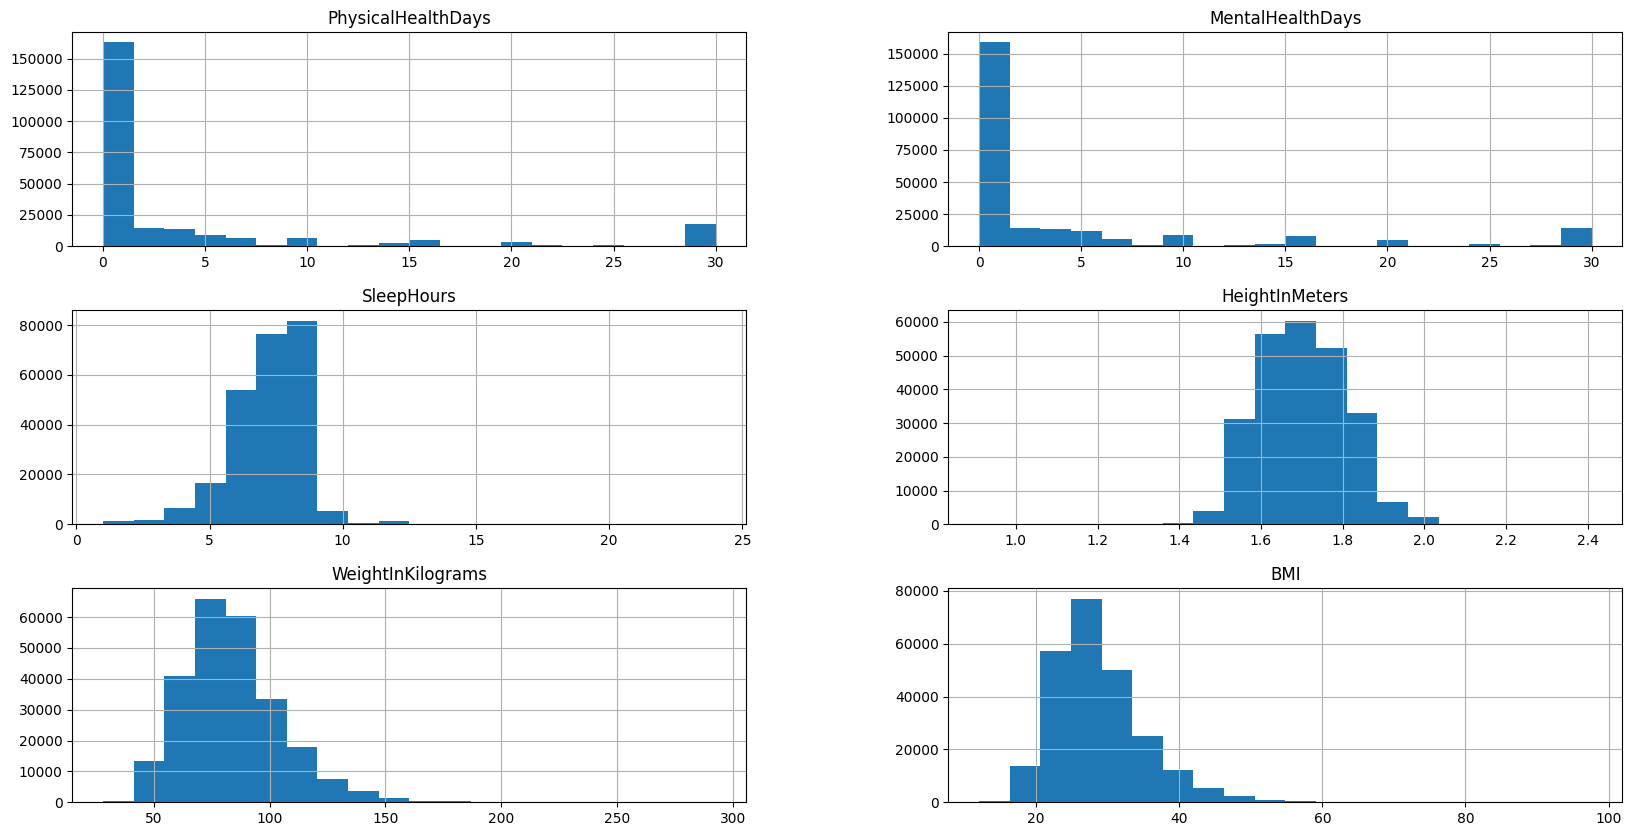

In [19]:
#plot  the numerical data
numerical.hist(figsize=(20,10), bins=20);

In [20]:
#filter out the categorical  data
categorical_data= data.select_dtypes(include=['object'])

In [21]:
categorical_data.columns

Index(['State', 'Sex', 'GeneralHealth', 'LastCheckupTime',
       'PhysicalActivities', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

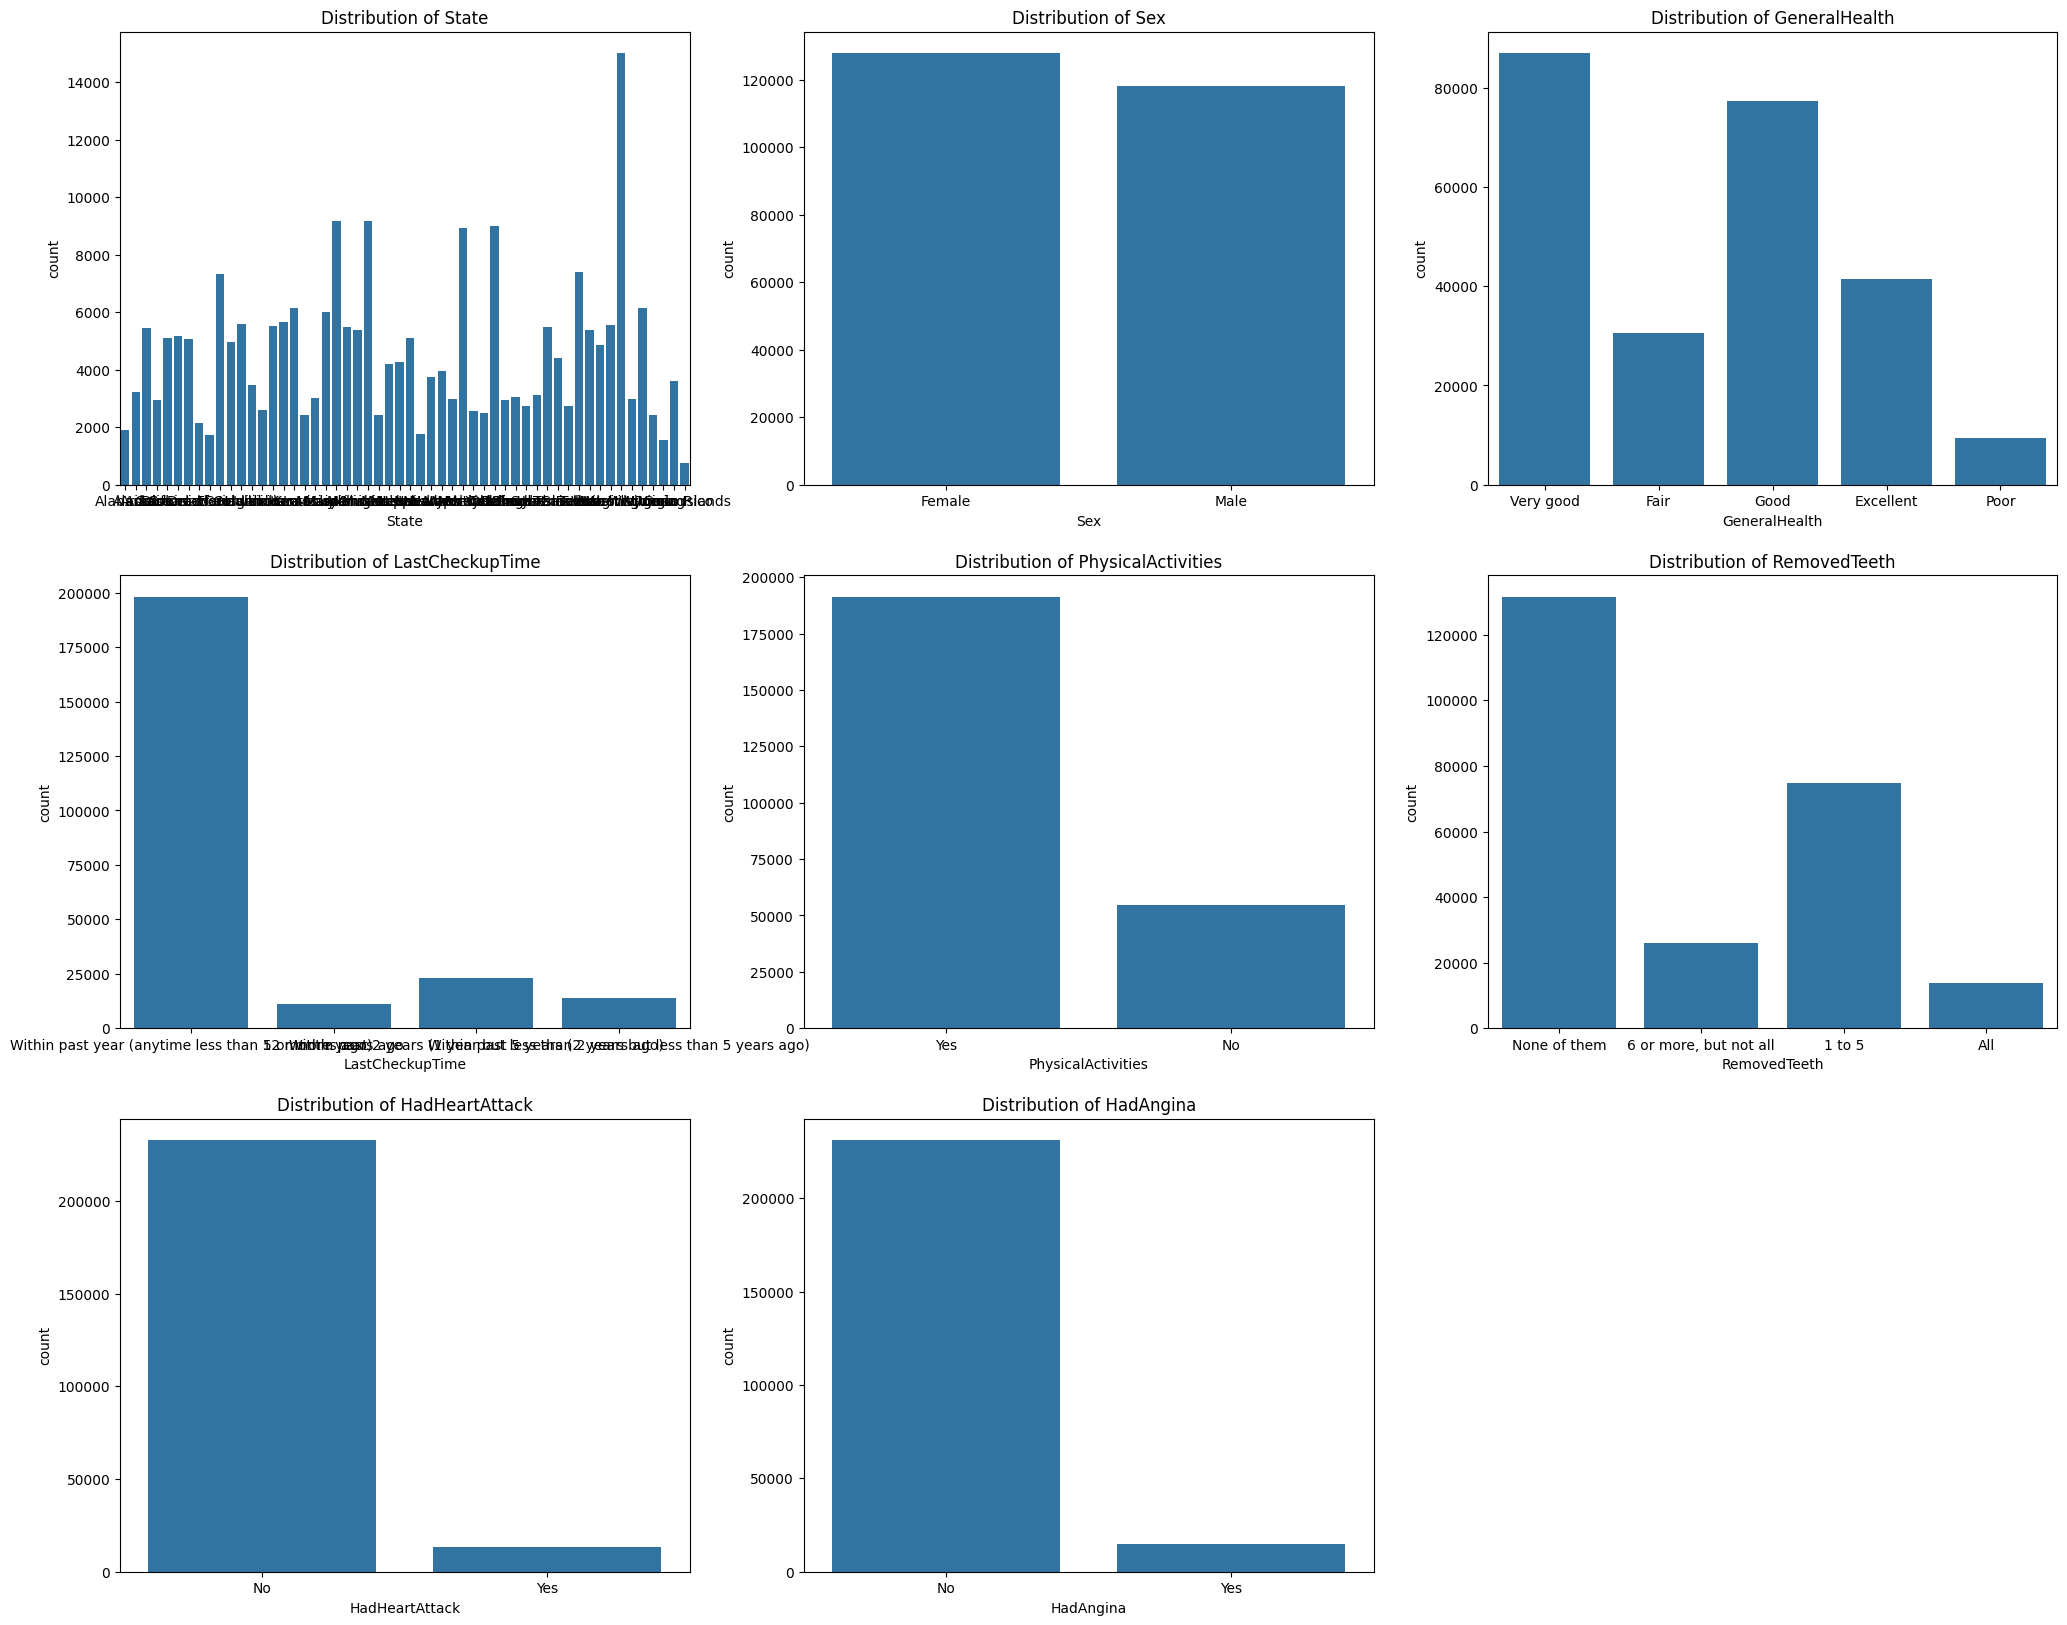

In [22]:
#plot the count plot of some categorical features to see their distribution
categories= ['State', 'Sex', 'GeneralHealth', 'LastCheckupTime',
       'PhysicalActivities', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina']

plt.rcParams["figure.figsize"] = (25,20)
for idx, x in enumerate(['State', 'Sex', 'GeneralHealth', 'LastCheckupTime',
       'PhysicalActivities', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina']):
    plt.subplot(3 , 3 , idx + 1)
    sns.countplot( x=data[x])
    plt.title(f'Distribution of {x}')
plt.savefig('new2.png')
plt.show()


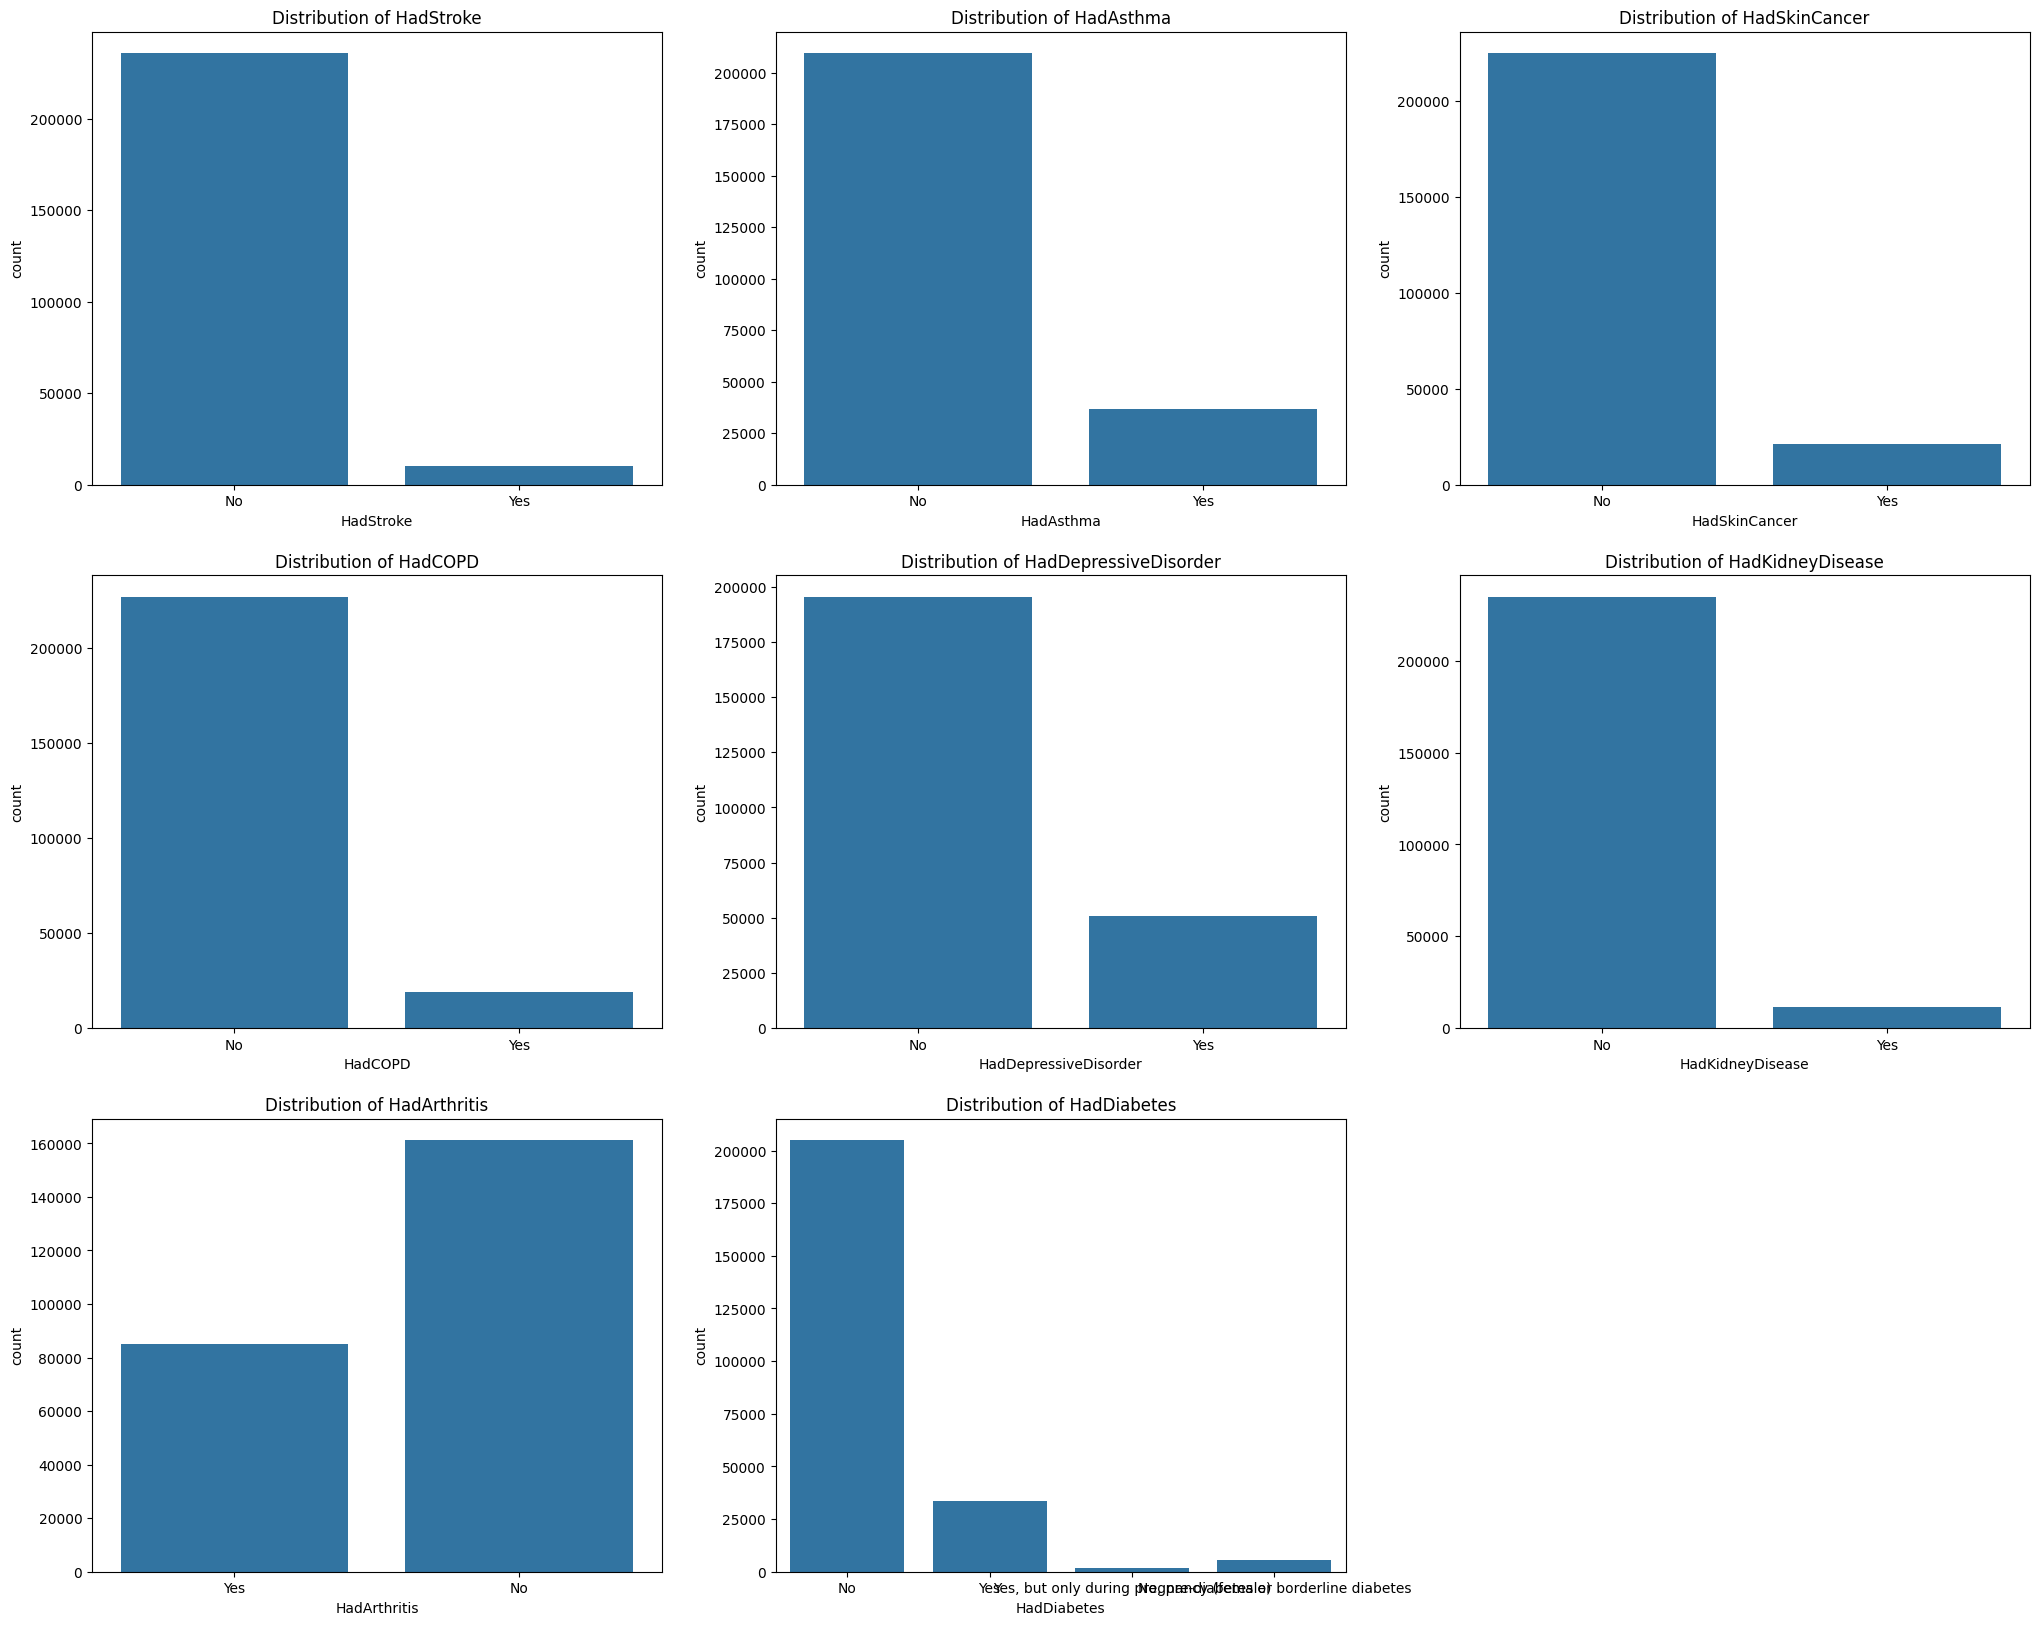

In [23]:
#plot the count plot of some categorical features to see their distribution
categories= [ 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes']

plt.rcParams["figure.figsize"] = (25,20)
for idx, x in enumerate([ 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes']):
    plt.subplot(3 , 3 , idx + 1)
    sns.countplot( x=data[x])
    plt.title(f'Distribution of {x}')
plt.savefig('new3.png')
plt.show()


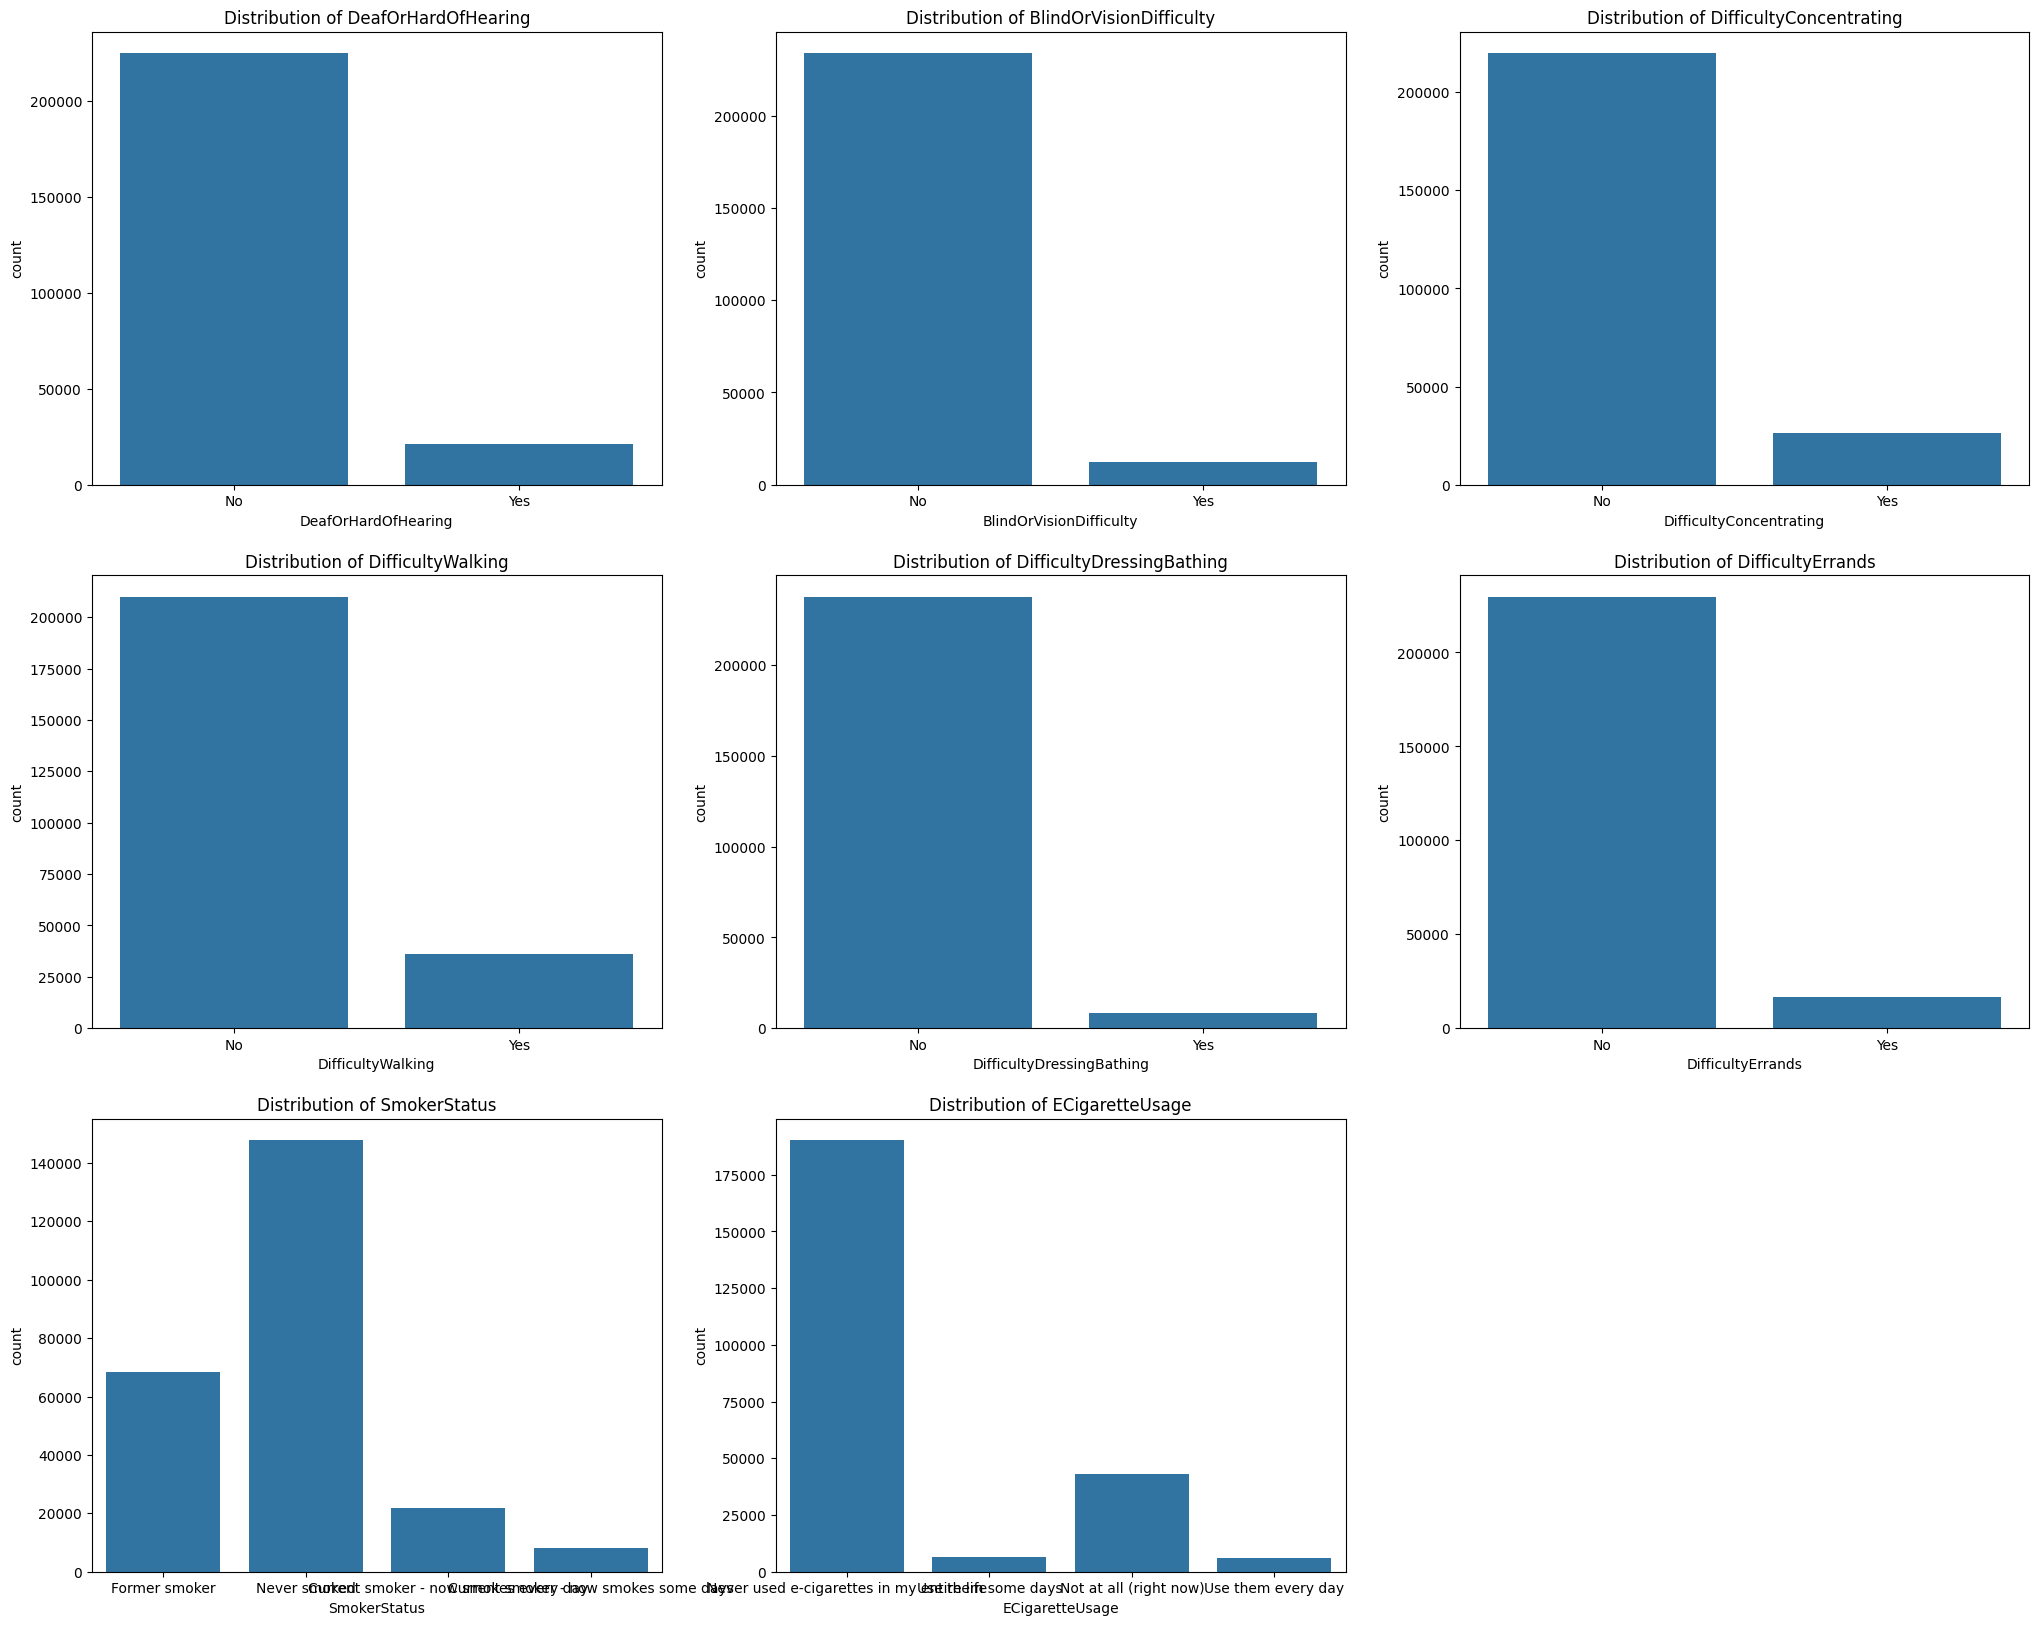

In [24]:
#plot the count plot of some categorical features to see their distribution
categories= [ 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage']

plt.rcParams["figure.figsize"] = (25,20)
for idx, x in enumerate([ 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage']):
    plt.subplot(3 , 3 , idx + 1)
    sns.countplot( x=data[x])
    plt.title(f'Distribution of {x}')
plt.savefig('new4.png')
plt.show()


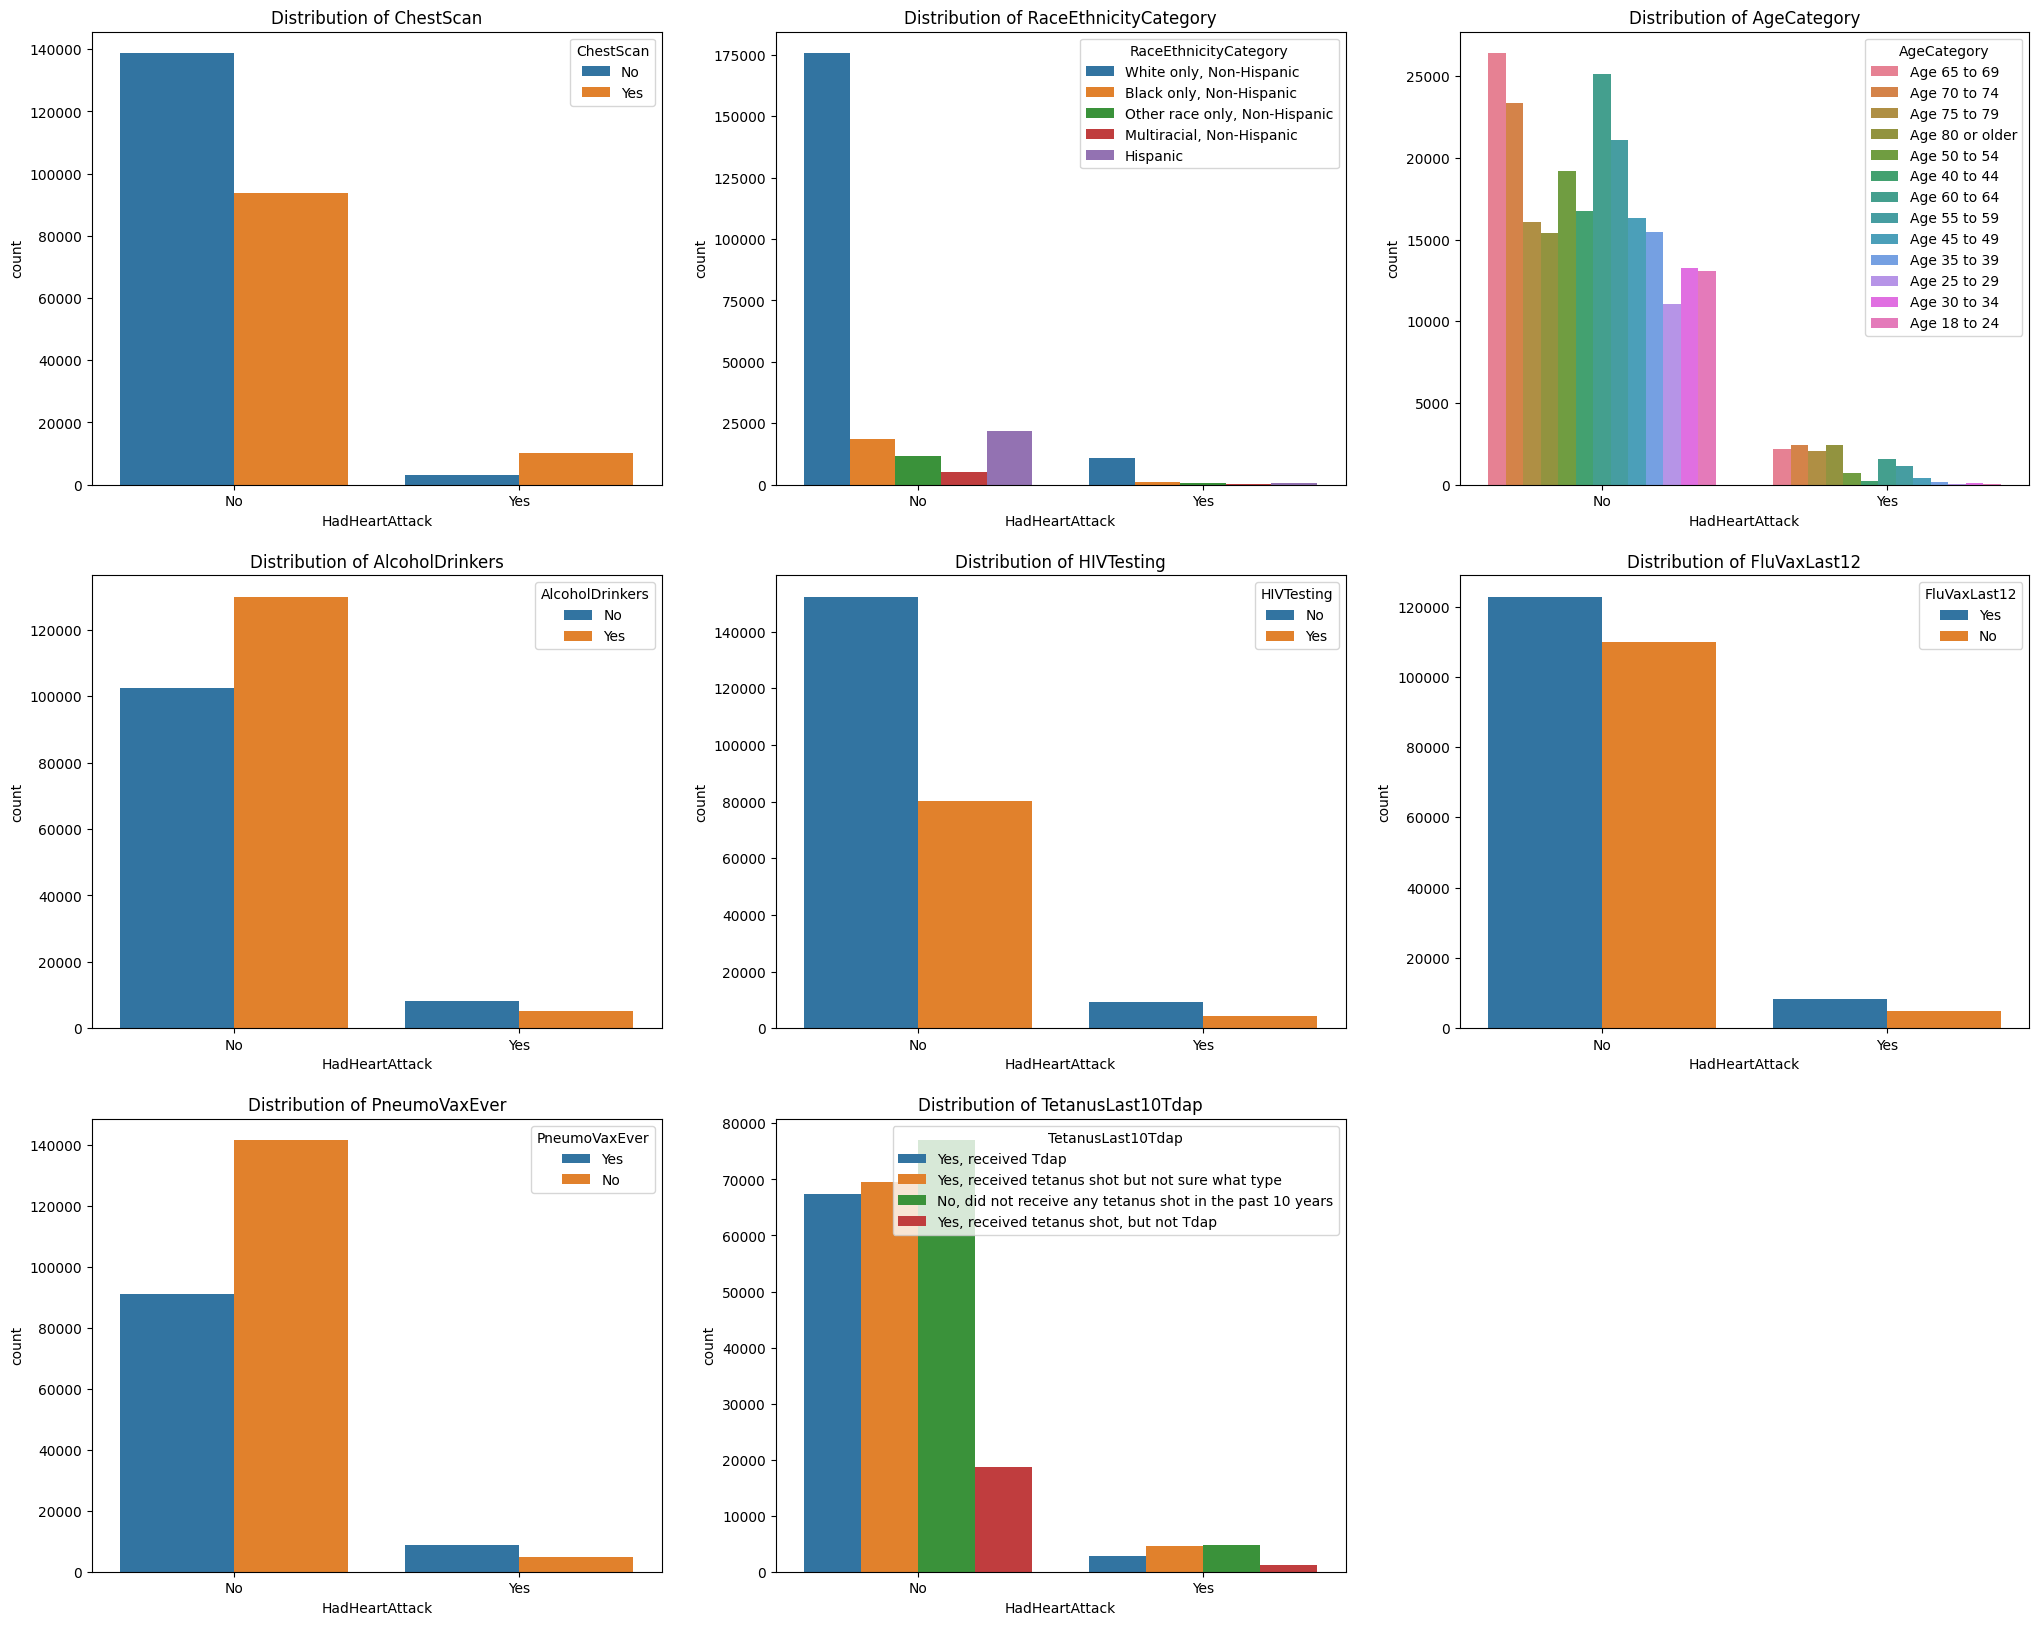

In [25]:
#plot the count plot of some categorical features to see their distribution
categories= [ 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap']

plt.rcParams["figure.figsize"] = (25,20)
for idx, x in enumerate(['ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap']):
    plt.subplot(3 , 3 , idx + 1)
    sns.countplot( x=data['HadHeartAttack'], hue=data[x])
    plt.title(f'Distribution of {x}')
plt.savefig('new6.png')
plt.show()


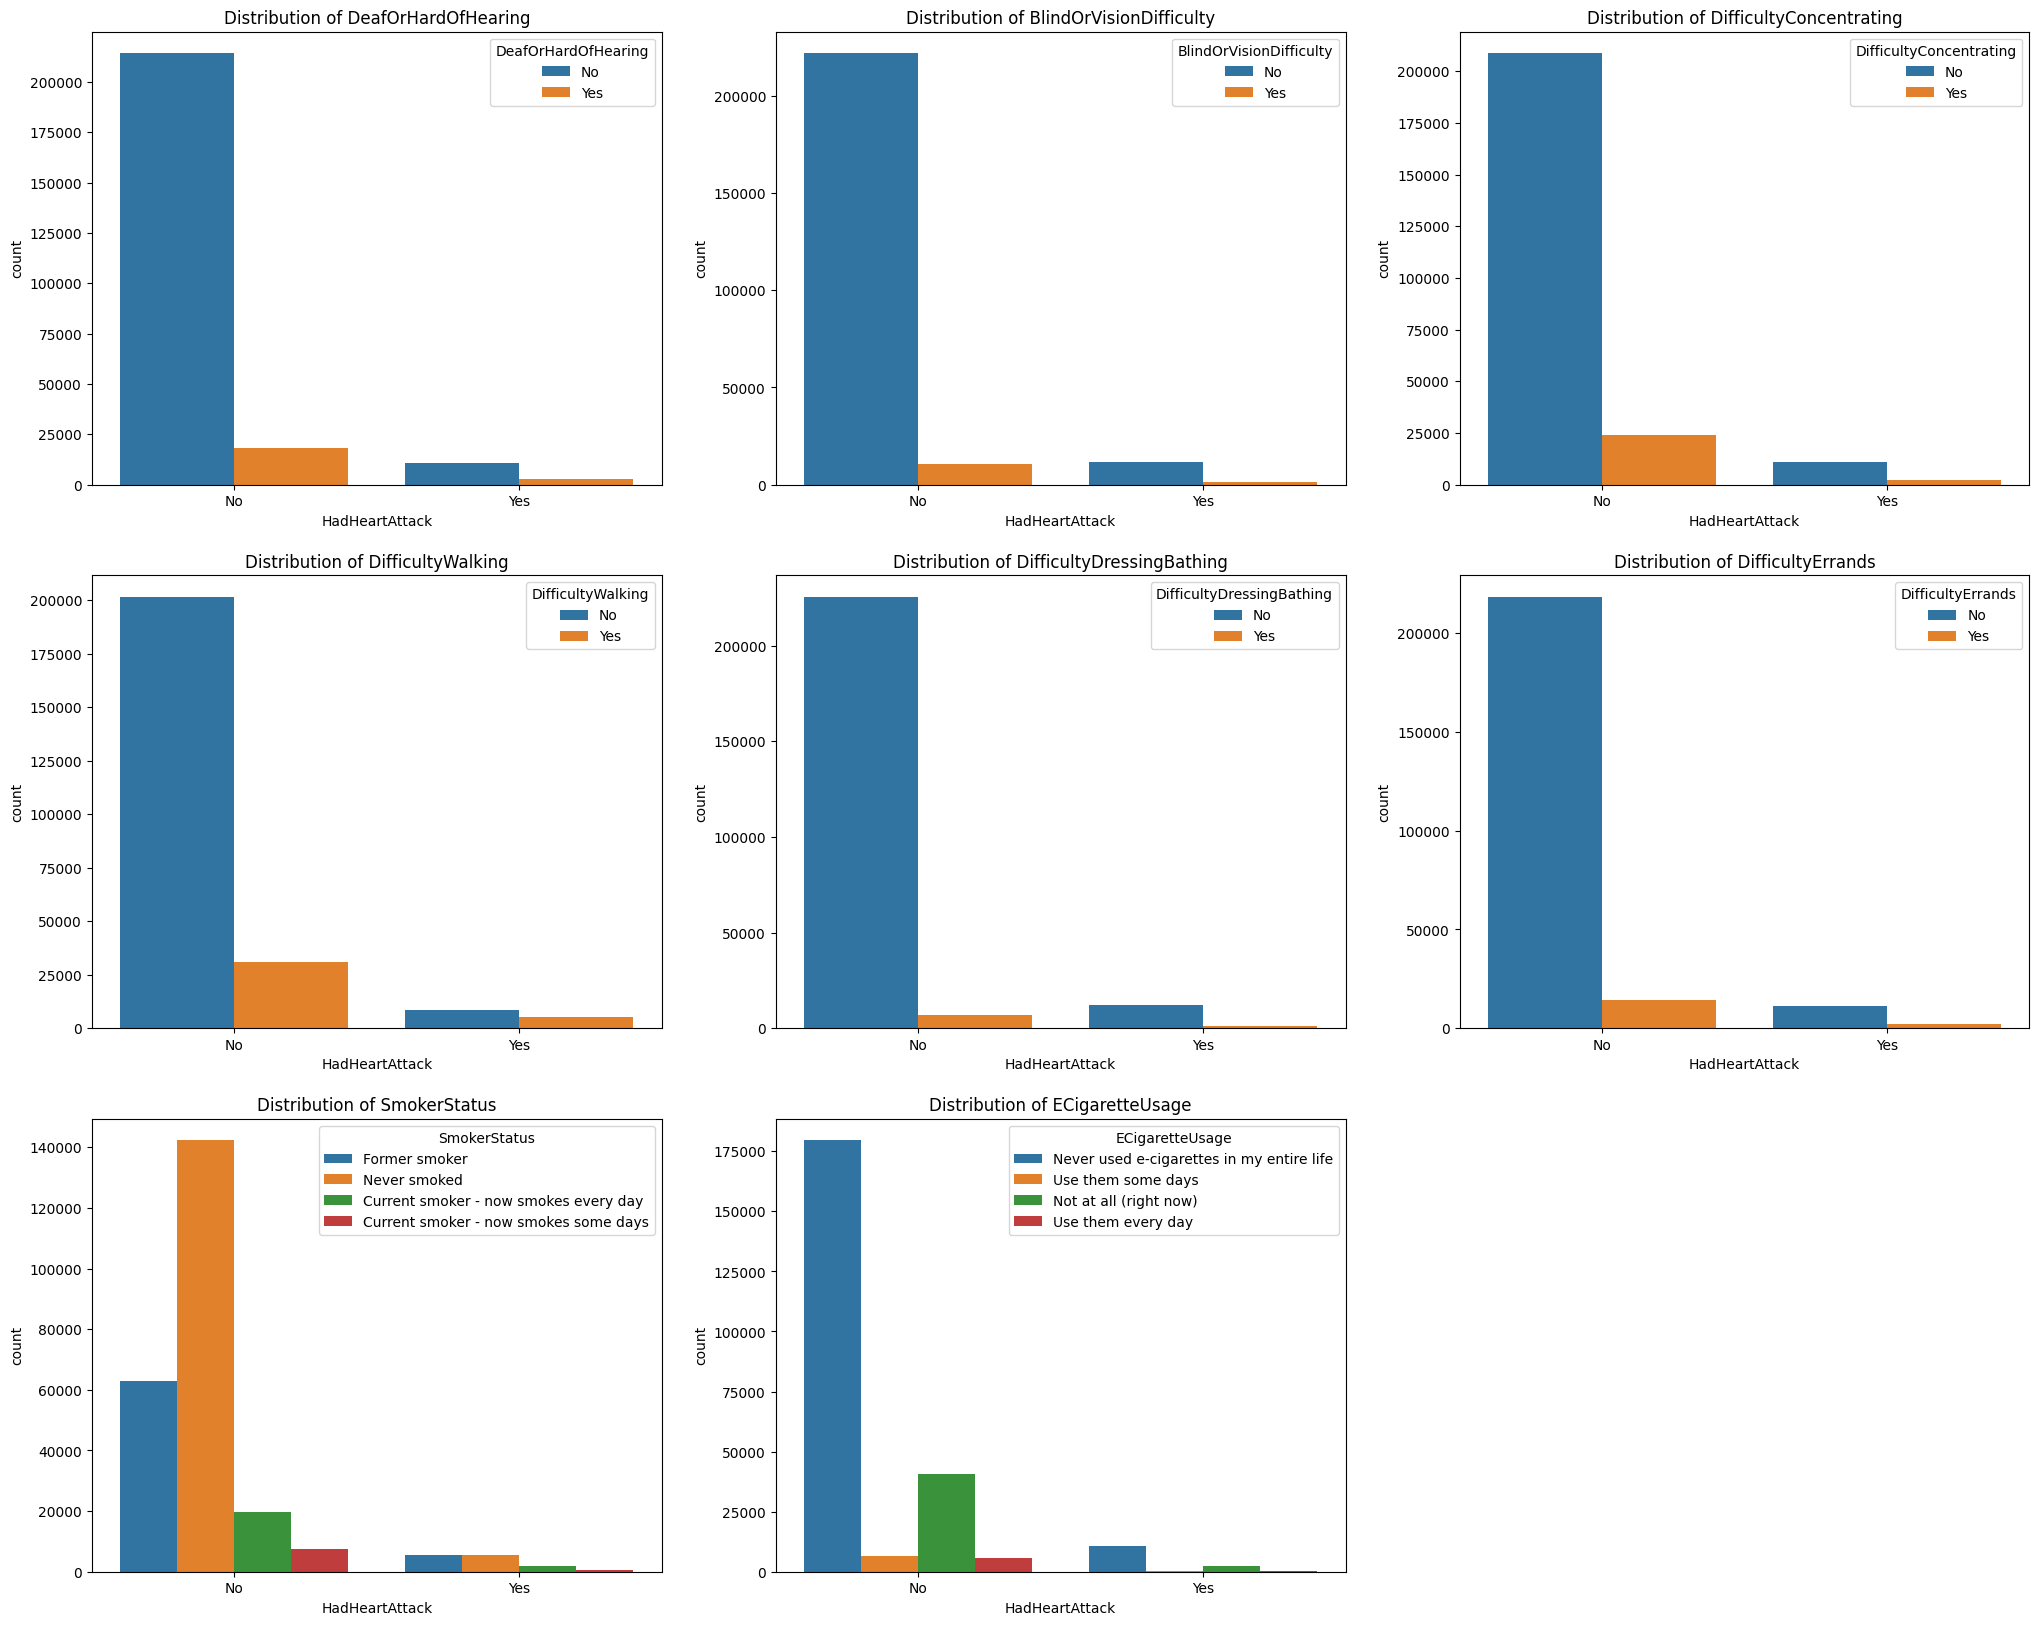

In [26]:
#plot the count plot of some categorical features to see their distribution
categories= [ 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage']

plt.rcParams["figure.figsize"] = (25,20)
for idx, x in enumerate([ 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage']):
    plt.subplot(3 , 3 , idx + 1)
    sns.countplot( x=data['HadHeartAttack'], hue=data[x])
    plt.title(f'Distribution of {x}')
plt.savefig('new7.png')
plt.show()


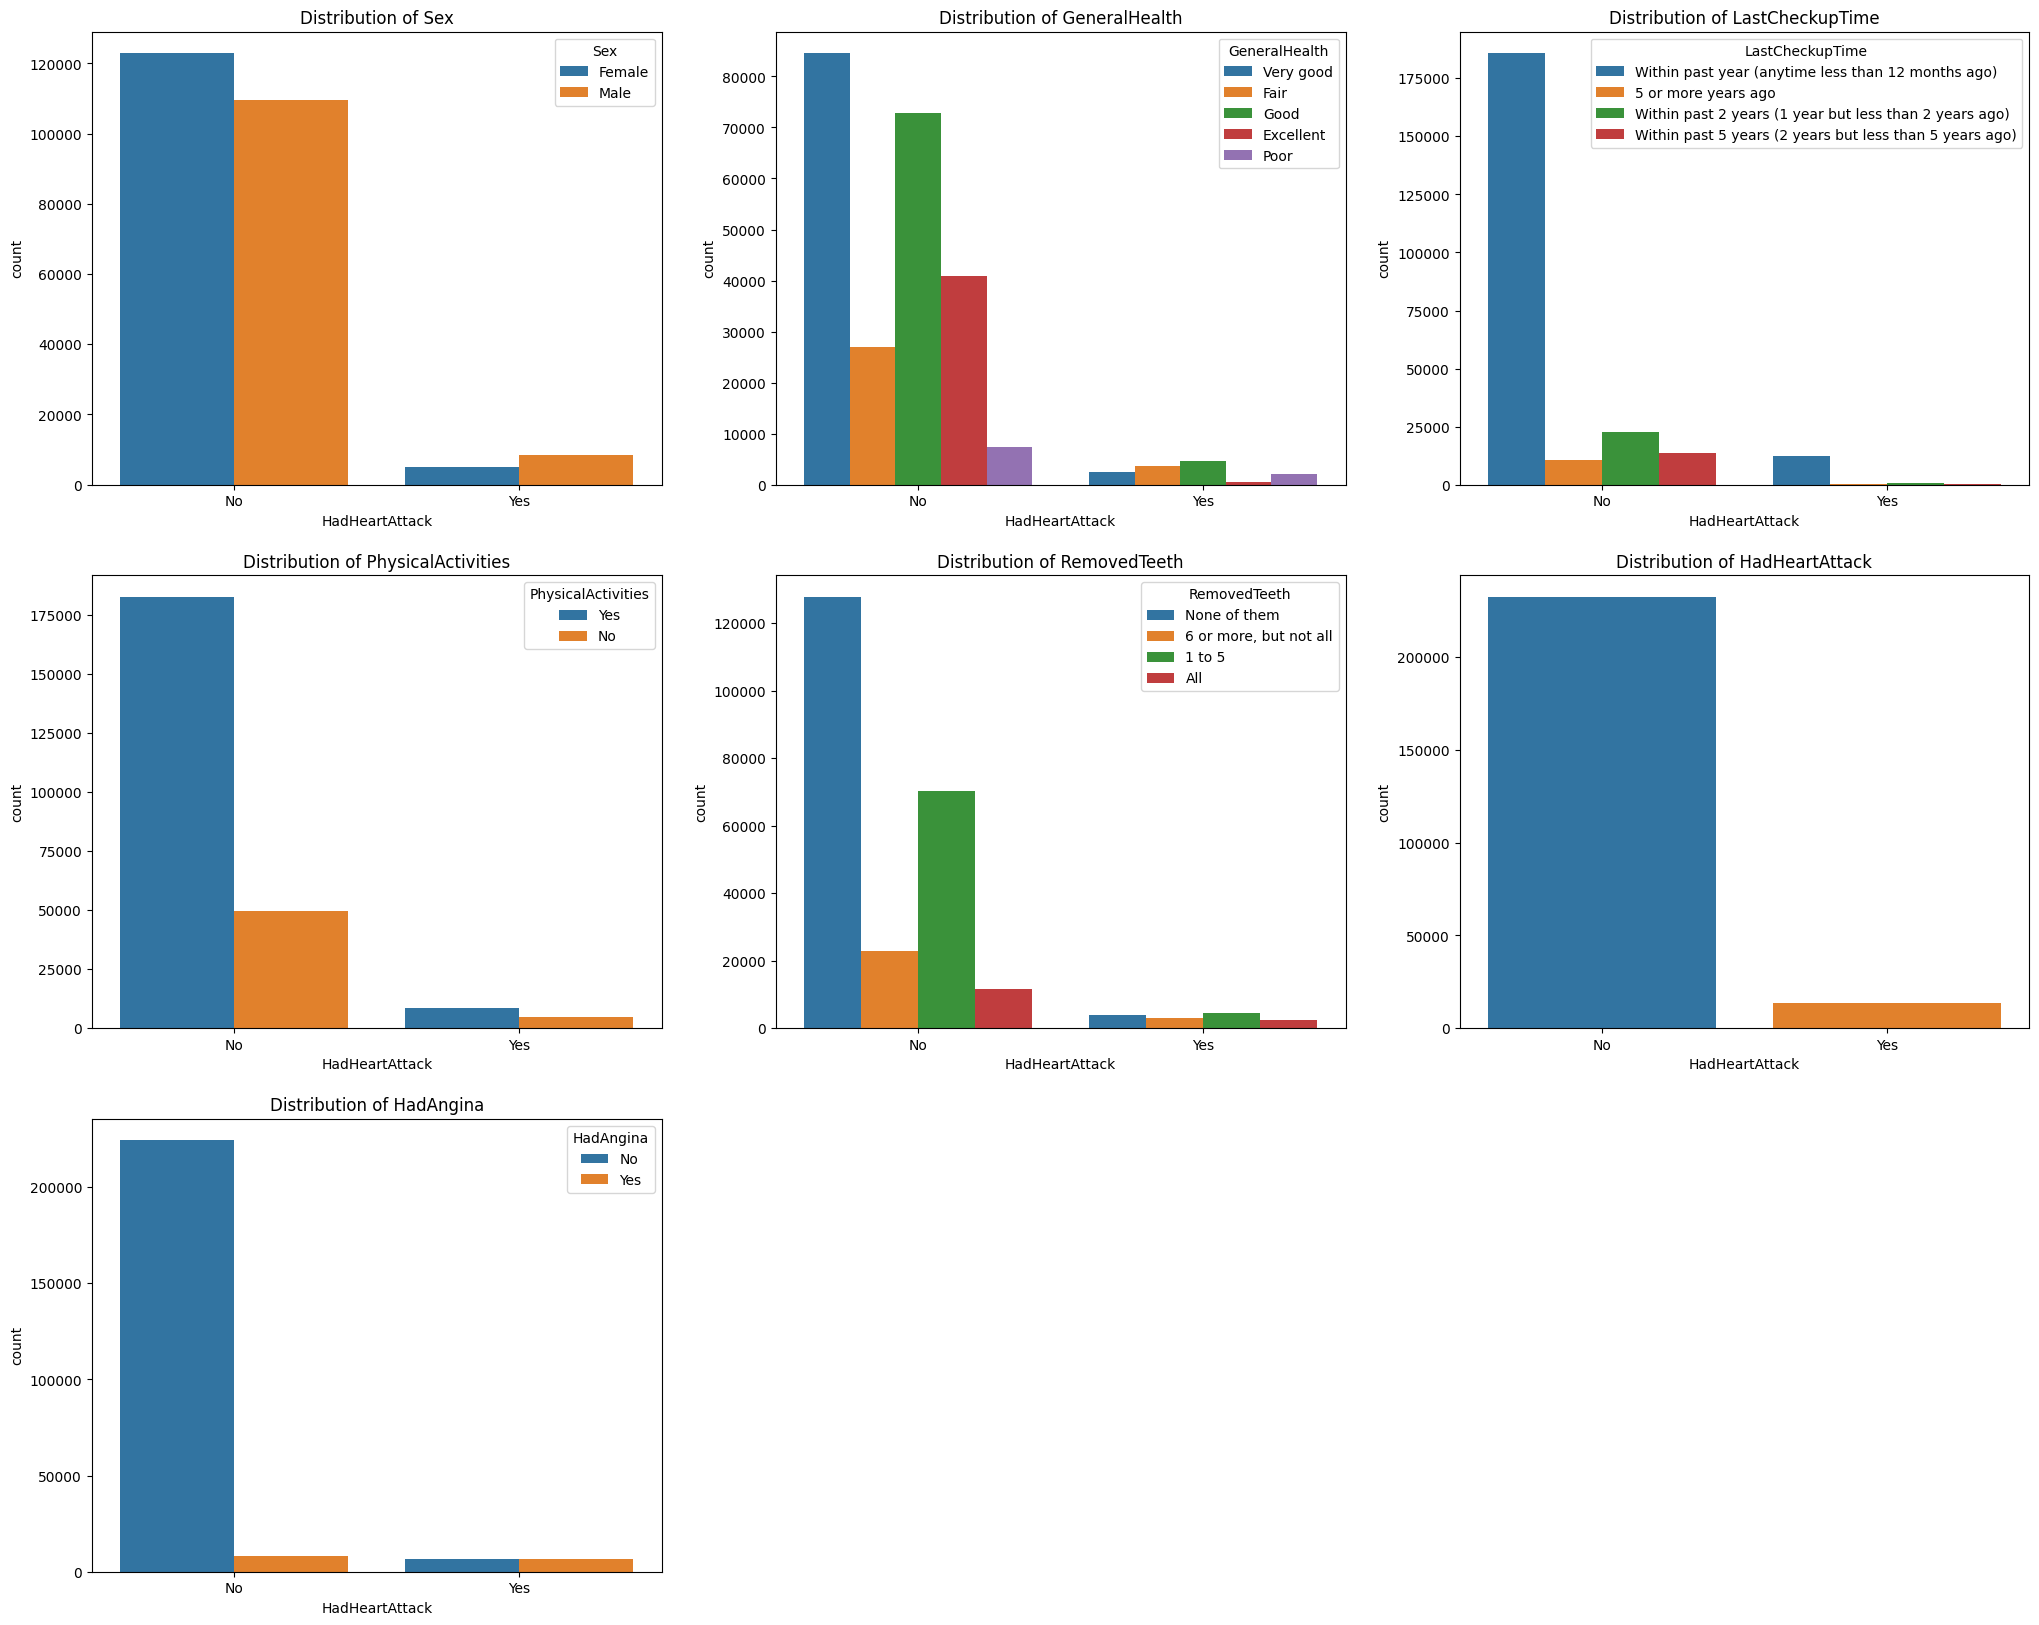

In [27]:
#plot the count plot of some categorical features to see their distribution
categories= [ 'Sex', 'GeneralHealth', 'LastCheckupTime',
       'PhysicalActivities', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina']

plt.rcParams["figure.figsize"] = (25,20)
for idx, x in enumerate(['Sex', 'GeneralHealth', 'LastCheckupTime',
       'PhysicalActivities', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina']):
    plt.subplot(3 , 3 , idx + 1)
    sns.countplot( x=data['HadHeartAttack'], hue=data[x])
    plt.title(f'Distribution of {x}')
plt.savefig('new8.png')
plt.show()


## Feature Selection/ Data Preprocessing
>In this feature selection technique, i will employ either of the two types which are
- 1 variance inflection factor
- 2 principal component analysis

In [28]:
numerical_features= data.select_dtypes(include=['int64','float64'])

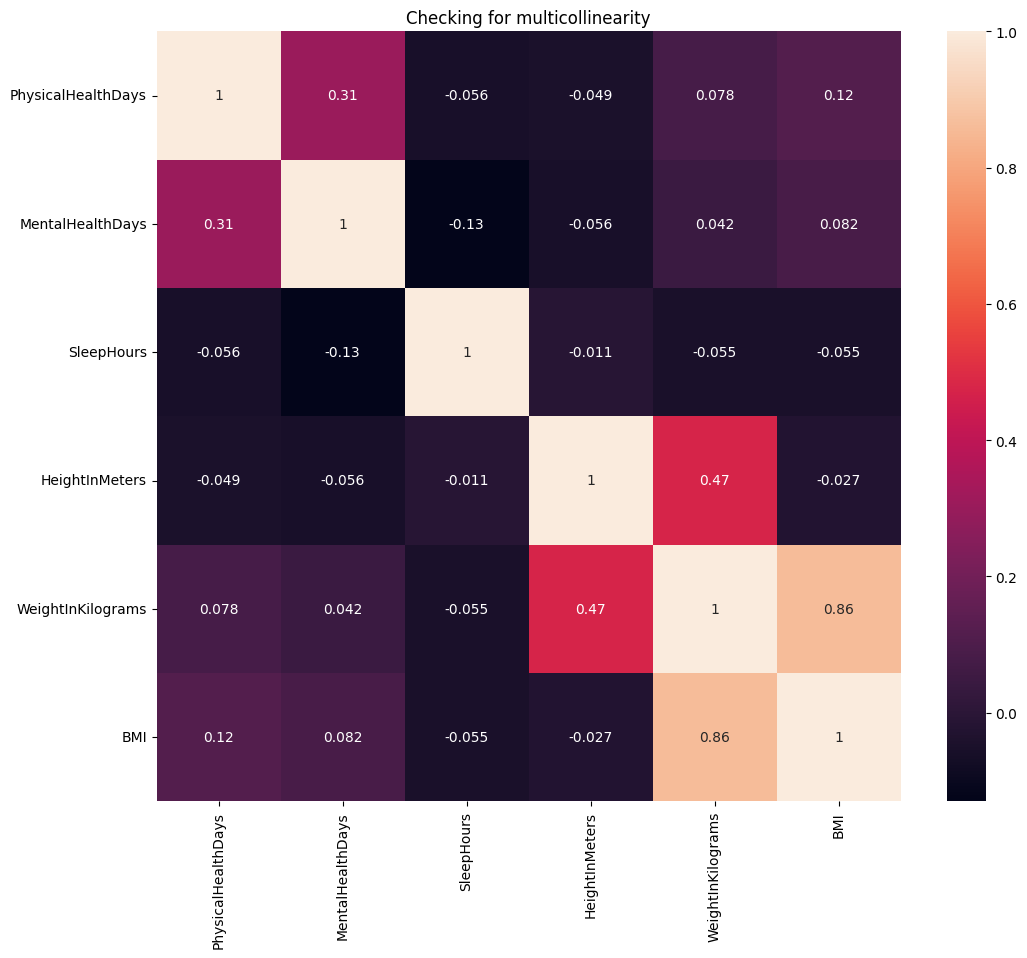

In [29]:
#create an heatmap to see the correlation betweeen different numerical varibles
plt.figure(figsize=[12,10])
sns.heatmap(numerical_features.corr(), annot=True)
plt.title('Checking for multicollinearity')
plt.savefig('new9.png');

In [30]:
#display their correlation values for more clarity
numerical_features.corr()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
PhysicalHealthDays,1.000000,0.306800,-0.056063,-0.049180,0.077505,0.116905
MentalHealthDays,0.306800,1.000000,-0.130100,-0.056010,0.042441,0.082182
SleepHours,-0.056063,-0.130100,1.000000,-0.011384,-0.054691,-0.054750
HeightInMeters,-0.049180,-0.056010,-0.011384,1.000000,0.473768,-0.026637
WeightInKilograms,0.077505,0.042441,-0.054691,0.473768,1.000000,0.859313
BMI,0.116905,0.082182,-0.054750,-0.026637,0.859313,1.000000


In [31]:
# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
numerical_features1 = data[["PhysicalHealthDays", "MentalHealthDays","SleepHours","BMI"]]
vif = [variance_inflation_factor(numerical_features1.values, i) for i in range(numerical_features1.shape[1])]

# Print VIF values for each feature
print("VIF values for each feature:")
for i, v in enumerate(vif):
    print(f"Feature {numerical_features1.columns[i]}: {v:.2f}")


VIF values for each feature:
Feature PhysicalHealthDays: 1.38
Feature MentalHealthDays: 1.40
Feature SleepHours: 10.89
Feature BMI: 11.53


In [32]:
data.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

- The threshold for severe multicollinearity is given by $>0.8$

In [33]:
#drop the sex, WeightInKilograms, and State columns since it will not really be needed for modeling
data=data.drop(columns=['Sex', 'WeightInKilograms','State'],axis=1)

In [34]:
data.columns

Index(['GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'RemovedTeeth',
       'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing',
       'BlindOrVisionDifficulty', 'DifficultyConcentrating',
       'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
       'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AgeCategory', 'HeightInMeters', 'BMI', 'AlcoholDrinkers', 'HIVTesting',
       'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [35]:
#drop the DifficultyDressingBathing,DifficultyErrands,RemovedTeeth,HadSkinCancer, DeafOrHardOfHearing ,BlindOrVisionDifficulty, DifficultyConcentrating, RaceEthnicityCategory columns since it will not really be needed for modeling
data=data.drop(columns=['DifficultyDressingBathing', 'DifficultyErrands','RemovedTeeth','HadSkinCancer',
                       'DeafOrHardOfHearing','BlindOrVisionDifficulty','DifficultyConcentrating',
                       'RaceEthnicityCategory'],axis=1)

In [36]:
#drop the sex column since it will not really be needed for modeling
data=data.drop(columns=['LastCheckupTime','ChestScan','AgeCategory',
                        'HeightInMeters','HIVTesting','FluVaxLast12','PneumoVaxEver',
                        'TetanusLast10Tdap','HighRiskLastYear','CovidPos'],axis=1)

In [37]:
data.columns

Index(['GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'PhysicalActivities', 'SleepHours', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadCOPD', 'HadDepressiveDisorder',
       'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DifficultyWalking',
       'SmokerStatus', 'ECigaretteUsage', 'BMI', 'AlcoholDrinkers'],
      dtype='object')

In [38]:
object_data= data.select_dtypes(include=['object'])

In [39]:
object_data.columns

Index(['GeneralHealth', 'PhysicalActivities', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadCOPD', 'HadDepressiveDisorder',
       'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DifficultyWalking',
       'SmokerStatus', 'ECigaretteUsage', 'AlcoholDrinkers'],
      dtype='object')

In [40]:
#encode the categorical variables

dummies= pd.get_dummies(data[['GeneralHealth', 'PhysicalActivities', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadCOPD', 'HadDepressiveDisorder',
       'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DifficultyWalking',
       'SmokerStatus', 'ECigaretteUsage', 'AlcoholDrinkers']])

In [41]:
dummies.head()

,GeneralHealth_Excellent,GeneralHealth_Fair,GeneralHealth_Good,GeneralHealth_Poor,GeneralHealth_Very good,PhysicalActivities_No,PhysicalActivities_Yes,HadAngina_No,HadAngina_Yes,HadStroke_No,...,SmokerStatus_Current smoker - now smokes every day,SmokerStatus_Current smoker - now smokes some days,SmokerStatus_Former smoker,SmokerStatus_Never smoked,ECigaretteUsage_Never used e-cigarettes in my entire life,ECigaretteUsage_Not at all (right now),ECigaretteUsage_Use them every day,ECigaretteUsage_Use them some days,AlcoholDrinkers_No,AlcoholDrinkers_Yes
0,False,False,False,False,True,False,True,True,False,True,...,False,False,True,False,True,False,False,False,True,False
1,False,False,False,False,True,False,True,True,False,True,...,False,False,True,False,True,False,False,False,True,False
2,False,False,False,False,True,True,False,True,False,True,...,False,False,True,False,True,False,False,False,False,True
3,False,True,False,False,False,False,True,True,False,True,...,False,False,False,True,True,False,False,False,True,False
4,False,False,True,False,False,False,True,True,False,True,...,False,False,False,True,True,False,False,False,True,False


In [42]:
#join the dummies and real data
data= pd.concat([data, dummies],axis=1)

In [43]:
#drop the encoded variables as they are not needed again
data=data.drop(columns=['GeneralHealth', 'PhysicalActivities',  'HadAngina',
       'HadStroke', 'HadAsthma', 'HadCOPD', 'HadDepressiveDisorder',
       'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DifficultyWalking',
       'SmokerStatus', 'ECigaretteUsage', 'AlcoholDrinkers'],axis=1)

In [44]:
data.columns

Index(['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
       'HadHeartAttack', 'BMI', 'GeneralHealth_Excellent',
       'GeneralHealth_Fair', 'GeneralHealth_Good', 'GeneralHealth_Poor',
       'GeneralHealth_Very good', 'PhysicalActivities_No',
       'PhysicalActivities_Yes', 'HadAngina_No', 'HadAngina_Yes',
       'HadStroke_No', 'HadStroke_Yes', 'HadAsthma_No', 'HadAsthma_Yes',
       'HadCOPD_No', 'HadCOPD_Yes', 'HadDepressiveDisorder_No',
       'HadDepressiveDisorder_Yes', 'HadKidneyDisease_No',
       'HadKidneyDisease_Yes', 'HadArthritis_No', 'HadArthritis_Yes',
       'HadDiabetes_No', 'HadDiabetes_No, pre-diabetes or borderline diabetes',
       'HadDiabetes_Yes',
       'HadDiabetes_Yes, but only during pregnancy (female)',
       'DifficultyWalking_No', 'DifficultyWalking_Yes',
       'SmokerStatus_Current smoker - now smokes every day',
       'SmokerStatus_Current smoker - now smokes some days',
       'SmokerStatus_Former smoker', 'SmokerStatus_Never smoked',
  

In [45]:
data.dtypes

PhysicalHealthDays                                           float64
MentalHealthDays                                             float64
SleepHours                                                   float64
HadHeartAttack                                                object
BMI                                                          float64
GeneralHealth_Excellent                                         bool
GeneralHealth_Fair                                              bool
GeneralHealth_Good                                              bool
GeneralHealth_Poor                                              bool
GeneralHealth_Very good                                         bool
PhysicalActivities_No                                           bool
PhysicalActivities_Yes                                          bool
HadAngina_No                                                    bool
HadAngina_Yes                                                   bool
HadStroke_No                      

In [46]:
#balance the data
#use smoting to balance the target variable
x= data.drop(columns=['HadHeartAttack'], axis=1)
y= data['HadHeartAttack']
smote= SMOTE()
x_resampled, y_resampled= smote.fit_resample(x,y)

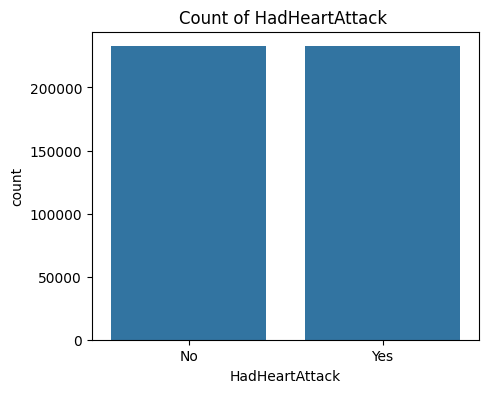

In [47]:
#check if it is balanced
plt.figure(figsize=[5,4])
data= pd.concat([x_resampled, y_resampled],axis=1)
sns.countplot(data=data, x='HadHeartAttack')
plt.title('Count of HadHeartAttack ');

In [48]:
data['HadHeartAttack'].dtype

dtype('O')

In [49]:
#scale the data
#scale the data so that we can have a data that is not wrongly skewed to be trained by the model
scaler= StandardScaler()
x_scaled=scaler.fit_transform(x)

In [50]:
#create a dataframe of the scaled data
scaleddata= pd.DataFrame(x_scaled, columns=x.columns)

In [51]:
scaleddata.dtypes

PhysicalHealthDays                                           float64
MentalHealthDays                                             float64
SleepHours                                                   float64
BMI                                                          float64
GeneralHealth_Excellent                                      float64
GeneralHealth_Fair                                           float64
GeneralHealth_Good                                           float64
GeneralHealth_Poor                                           float64
GeneralHealth_Very good                                      float64
PhysicalActivities_No                                        float64
PhysicalActivities_Yes                                       float64
HadAngina_No                                                 float64
HadAngina_Yes                                                float64
HadStroke_No                                                 float64
HadStroke_Yes                     

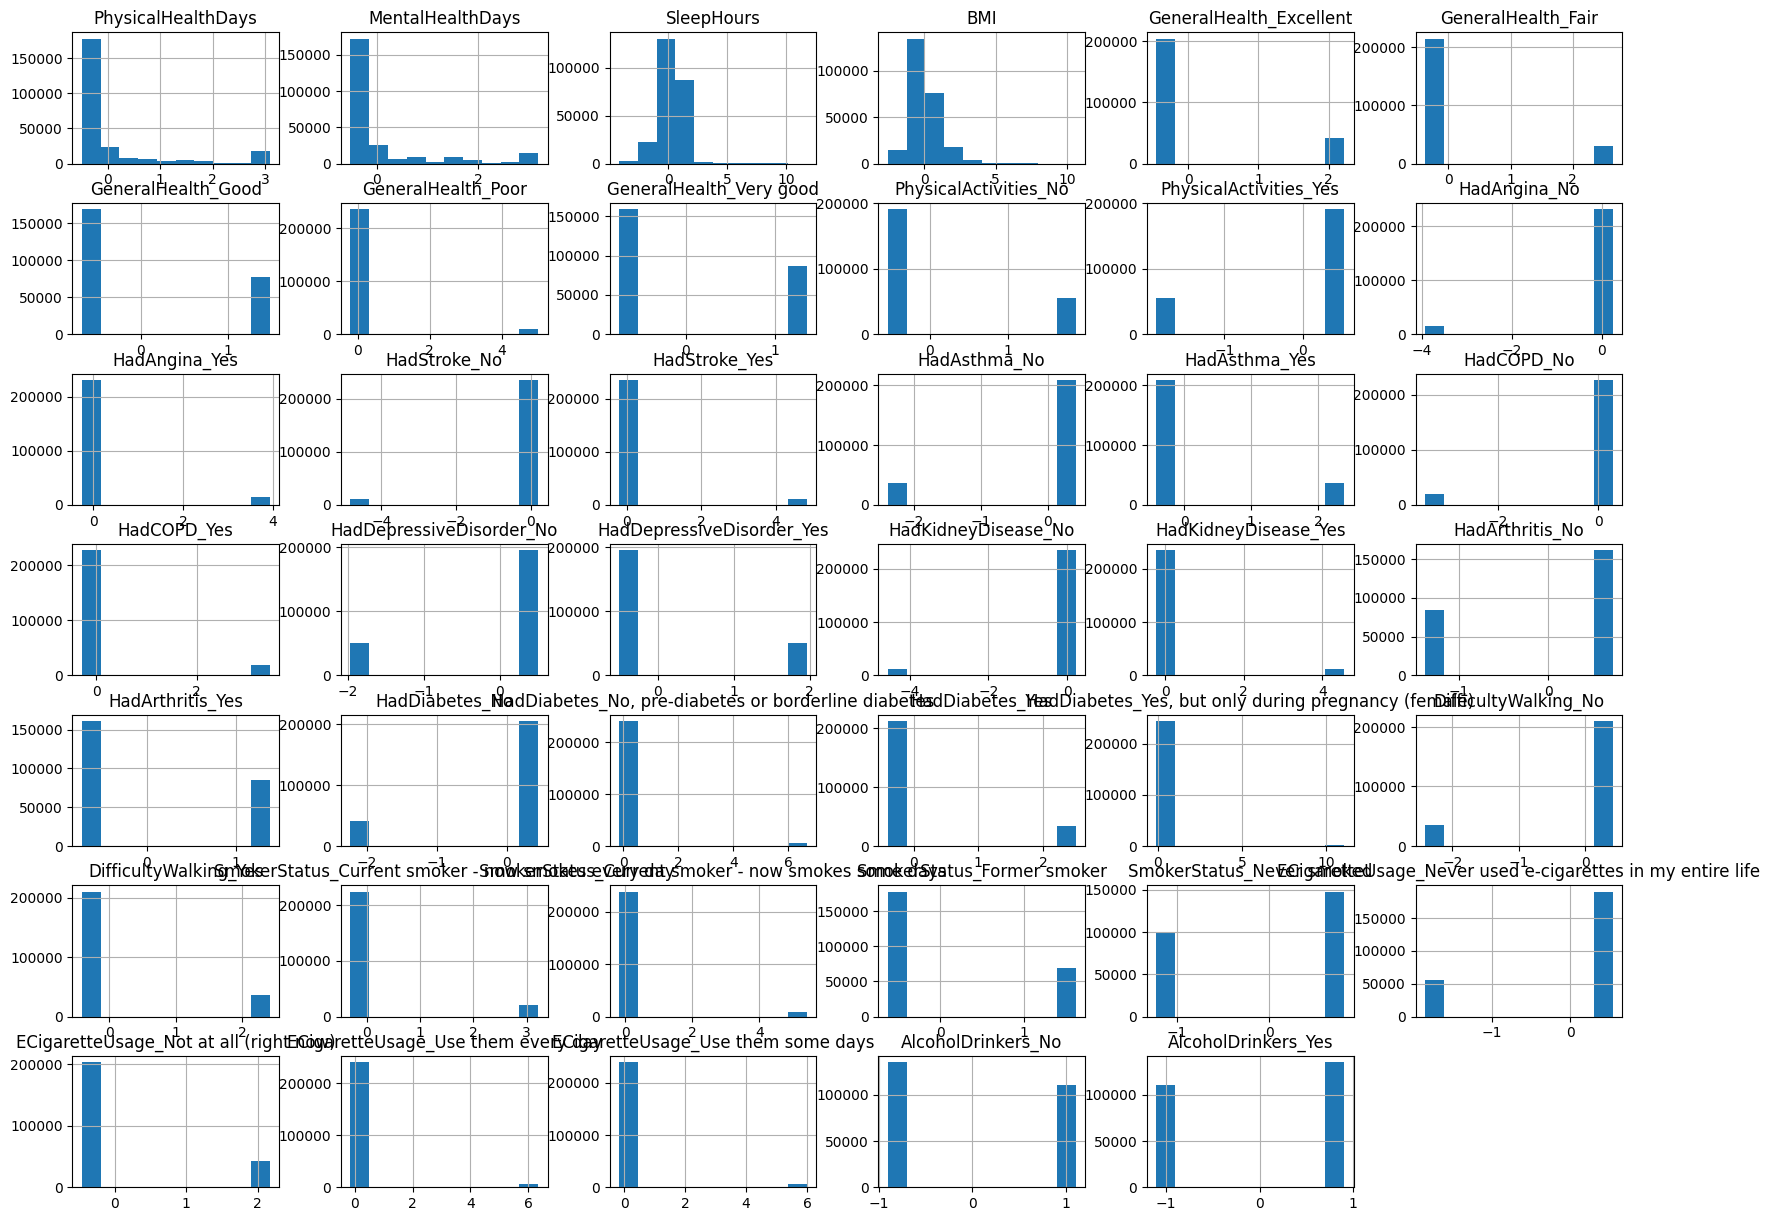

In [52]:
scaleddata.columns
scaleddata.hist(figsize=(20,15));

In [53]:
x.columns

Index(['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'BMI',
       'GeneralHealth_Excellent', 'GeneralHealth_Fair', 'GeneralHealth_Good',
       'GeneralHealth_Poor', 'GeneralHealth_Very good',
       'PhysicalActivities_No', 'PhysicalActivities_Yes', 'HadAngina_No',
       'HadAngina_Yes', 'HadStroke_No', 'HadStroke_Yes', 'HadAsthma_No',
       'HadAsthma_Yes', 'HadCOPD_No', 'HadCOPD_Yes',
       'HadDepressiveDisorder_No', 'HadDepressiveDisorder_Yes',
       'HadKidneyDisease_No', 'HadKidneyDisease_Yes', 'HadArthritis_No',
       'HadArthritis_Yes', 'HadDiabetes_No',
       'HadDiabetes_No, pre-diabetes or borderline diabetes',
       'HadDiabetes_Yes',
       'HadDiabetes_Yes, but only during pregnancy (female)',
       'DifficultyWalking_No', 'DifficultyWalking_Yes',
       'SmokerStatus_Current smoker - now smokes every day',
       'SmokerStatus_Current smoker - now smokes some days',
       'SmokerStatus_Former smoker', 'SmokerStatus_Never smoked',
       'ECigaretteUs

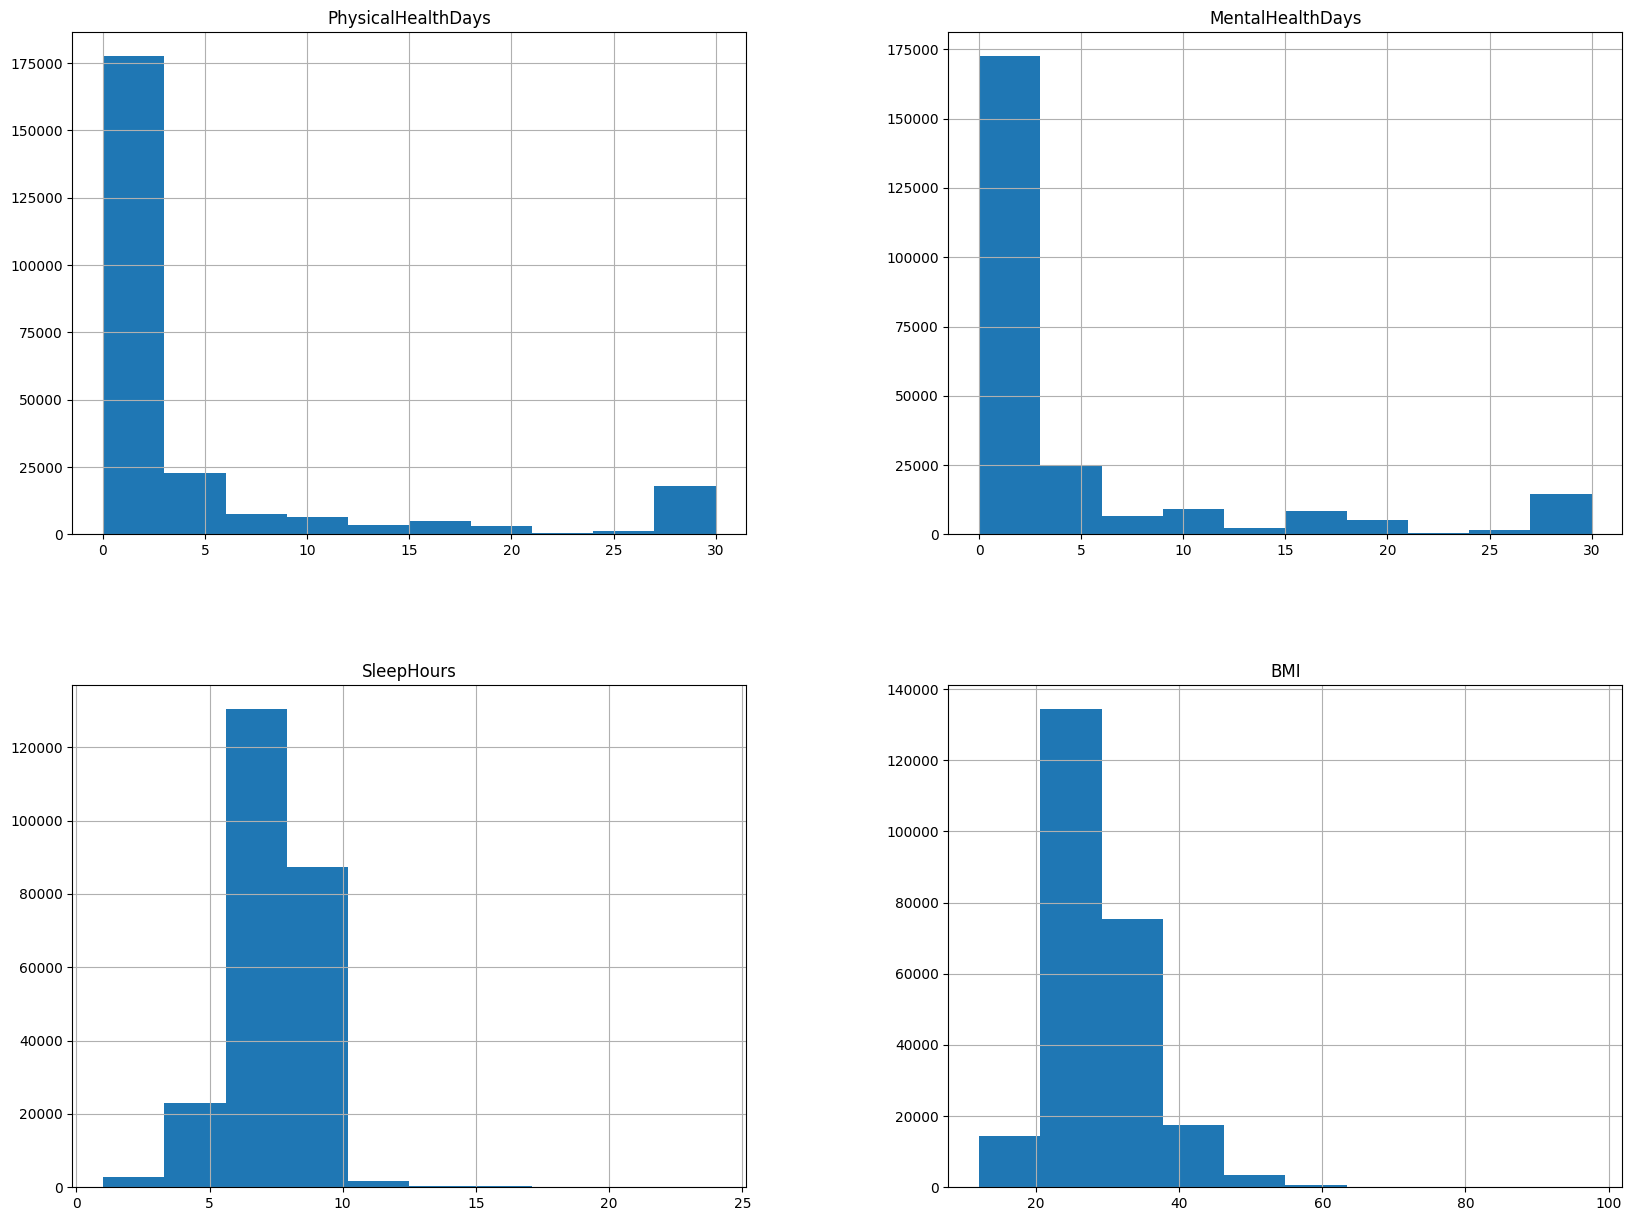

In [54]:
#plot the scaled data to see if their distribution shows that they have been scaled
x.hist(figsize=(20,15));

In [55]:
#shpw the descriptive statistics of the scaled data  to see that their mean is 0 and variance is 1
scaleddata.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,BMI,GeneralHealth_Excellent,GeneralHealth_Fair,GeneralHealth_Good,GeneralHealth_Poor,GeneralHealth_Very good,PhysicalActivities_No,...,SmokerStatus_Current smoker - now smokes every day,SmokerStatus_Current smoker - now smokes some days,SmokerStatus_Former smoker,SmokerStatus_Never smoked,ECigaretteUsage_Never used e-cigarettes in my entire life,ECigaretteUsage_Not at all (right now),ECigaretteUsage_Use them every day,ECigaretteUsage_Use them some days,AlcoholDrinkers_No,AlcoholDrinkers_Yes
count,2.460220e+05,2.460220e+05,2.460220e+05,2.460220e+05,2.460220e+05,2.460220e+05,2.460220e+05,2.460220e+05,2.460220e+05,2.460220e+05,...,2.460220e+05,2.460220e+05,2.460220e+05,2.460220e+05,2.460220e+05,2.460220e+05,2.460220e+05,2.460220e+05,2.460220e+05,2.460220e+05
mean,-2.714839e-17,5.631847e-17,2.520540e-16,-1.302184e-17,-1.426735e-17,-1.513378e-17,7.292520e-18,-1.930713e-17,-7.509130e-19,1.895694e-17,...,-2.657077e-17,6.779878e-17,6.584929e-17,1.132146e-17,1.182977e-16,8.144518e-18,-2.711951e-17,-8.163290e-17,5.094656e-17,-1.022397e-17
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-4.900203e-01,-5.142921e-01,-4.179511e+00,-2.555763e+00,-4.506209e-01,-3.773058e-01,-6.775638e-01,-1.996438e-01,-7.396515e-01,-5.347264e-01,...,-3.107017e-01,-1.845005e-01,-6.213521e-01,-1.226030e+00,-1.844338e+00,-4.620382e-01,-1.574979e-01,-1.667794e-01,-9.045719e-01,-1.105495e+00
25%,-4.900203e-01,-5.142921e-01,-7.089239e-01,-6.751862e-01,-4.506209e-01,-3.773058e-01,-6.775638e-01,-1.996438e-01,-7.396515e-01,-5.347264e-01,...,-3.107017e-01,-1.845005e-01,-6.213521e-01,-1.226030e+00,5.422001e-01,-4.620382e-01,-1.574979e-01,-1.667794e-01,-9.045719e-01,-1.105495e+00
50%,-4.900203e-01,-5.142921e-01,-1.480651e-02,-1.854687e-01,-4.506209e-01,-3.773058e-01,-6.775638e-01,-1.996438e-01,-7.396515e-01,-5.347264e-01,...,-3.107017e-01,-1.845005e-01,-6.213521e-01,8.156409e-01,5.422001e-01,-4.620382e-01,-1.574979e-01,-1.667794e-01,-9.045719e-01,9.045719e-01
75%,-1.331250e-01,-2.062771e-02,6.793109e-01,4.946091e-01,-4.506209e-01,-3.773058e-01,1.475876e+00,-1.996438e-01,1.351988e+00,-5.347264e-01,...,-3.107017e-01,-1.845005e-01,1.609393e+00,8.156409e-01,5.422001e-01,-4.620382e-01,-1.574979e-01,-1.667794e-01,1.105495e+00,9.045719e-01
max,3.078933e+00,3.188191e+00,1.178519e+01,1.058985e+01,2.219160e+00,2.650370e+00,1.475876e+00,5.008921e+00,1.351988e+00,1.870115e+00,...,3.218522e+00,5.420040e+00,1.609393e+00,8.156409e-01,5.422001e-01,2.164323e+00,6.349293e+00,5.995943e+00,1.105495e+00,9.045719e-01


**Feature selection**

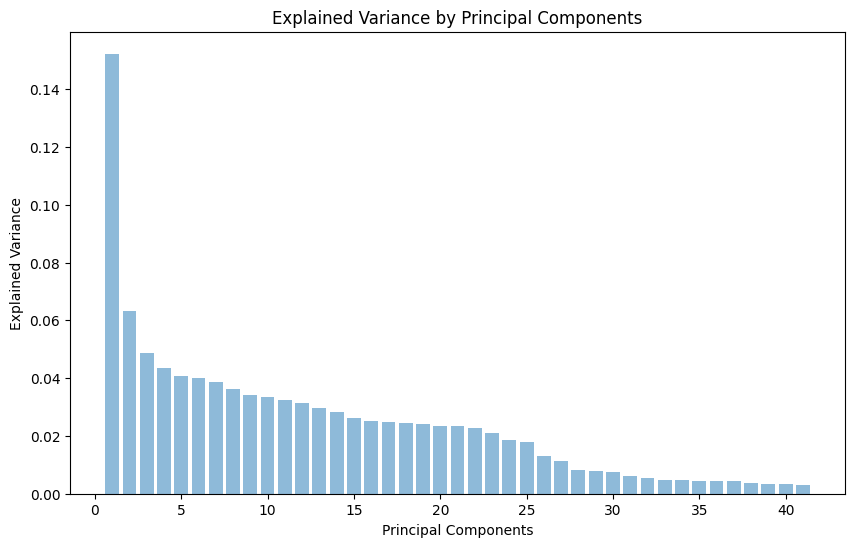

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Assuming 'data' is your DataFrame and 'x' is your feature matrix
X = data.drop(columns=['HadHeartAttack'], axis=1)

# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

# Compute the covariance matrix
cov_matrix = np.cov(x_scaled.T)

# Compute the principal components
pca = PCA()

# Fit PCA
pca.fit(x_scaled)

# Determine the number of components to keep
explained_variance = pca.explained_variance_ratio_
n_components = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1

# Fit PCA with the selected number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(x_scaled)

# Get the names of the columns
component_names = ['PC{}'.format(i+1) for i in range(pca.n_components_)]

# Plot the explained variance by principal components
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.show()



In [57]:
# Select the top N components as your "best features"
selected_features = X_pca[:, :n_components]

# Create a DataFrame with the selected features
selected_data = pd.DataFrame(data=selected_features, columns=component_names)
print(selected_data.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.321840 -0.925268  0.816349  0.390757  0.619261  0.059225 -1.166423   
1 -0.508364 -1.660305  0.619659  0.217006  0.446086  1.861773 -0.379784   
2  0.270465 -0.462653  0.766661 -0.142183 -0.262855 -0.837466 -3.843363   
3  1.187071  0.172559 -2.220727  0.456280 -1.208482  0.299846 -1.347096   
4 -0.974959 -0.652731 -1.317285  0.368317  0.180387  1.017518 -0.778683   

        PC8       PC9      PC10  ...      PC21      PC22      PC23      PC24  \
0 -1.101695 -2.170043  0.497833  ...  0.310125  0.135614 -0.316090  0.323179   
1 -0.317954 -1.095235  0.313055  ...  0.304895 -1.389093 -0.067072  0.085022   
2  1.505732 -0.115652  0.602999  ... -0.075050  0.516883  0.088679  0.666517   
3 -1.824314 -1.563192  0.855694  ... -0.129003  1.734395 -0.148062  0.107897   
4 -1.750673 -0.715746  1.435608  ... -0.342163 -0.580410  0.565846 -0.099531   

       PC25      PC26      PC27      PC28      PC29      PC30  
0  0

In [58]:
data.columns

Index(['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'BMI',
       'GeneralHealth_Excellent', 'GeneralHealth_Fair', 'GeneralHealth_Good',
       'GeneralHealth_Poor', 'GeneralHealth_Very good',
       'PhysicalActivities_No', 'PhysicalActivities_Yes', 'HadAngina_No',
       'HadAngina_Yes', 'HadStroke_No', 'HadStroke_Yes', 'HadAsthma_No',
       'HadAsthma_Yes', 'HadCOPD_No', 'HadCOPD_Yes',
       'HadDepressiveDisorder_No', 'HadDepressiveDisorder_Yes',
       'HadKidneyDisease_No', 'HadKidneyDisease_Yes', 'HadArthritis_No',
       'HadArthritis_Yes', 'HadDiabetes_No',
       'HadDiabetes_No, pre-diabetes or borderline diabetes',
       'HadDiabetes_Yes',
       'HadDiabetes_Yes, but only during pregnancy (female)',
       'DifficultyWalking_No', 'DifficultyWalking_Yes',
       'SmokerStatus_Current smoker - now smokes every day',
       'SmokerStatus_Current smoker - now smokes some days',
       'SmokerStatus_Former smoker', 'SmokerStatus_Never smoked',
       'ECigaretteUs

In [59]:
#separate the predictors from the target
x= data.drop(columns=['HadDepressiveDisorder_Yes',
       'HadKidneyDisease_No', 'HadKidneyDisease_Yes', 'HadArthritis_No',
       'HadArthritis_Yes', 'HadDiabetes_No',
       'HadDiabetes_No, pre-diabetes or borderline diabetes',
       'HadDiabetes_Yes',
       'HadDiabetes_Yes, but only during pregnancy (female)',
       'DifficultyWalking_No', 'DifficultyWalking_Yes',
       'SmokerStatus_Current smoker - now smokes every day',
       'SmokerStatus_Current smoker - now smokes some days',
       'SmokerStatus_Former smoker', 'SmokerStatus_Never smoked',
       'ECigaretteUsage_Never used e-cigarettes in my entire life',
       'ECigaretteUsage_Not at all (right now)',
       'ECigaretteUsage_Use them every day',
       'ECigaretteUsage_Use them some days', 'AlcoholDrinkers_No',
       'AlcoholDrinkers_Yes', 'HadHeartAttack'],axis=1)
y= data['HadHeartAttack']

In [60]:
x

,PhysicalHealthDays,MentalHealthDays,SleepHours,BMI,GeneralHealth_Excellent,GeneralHealth_Fair,GeneralHealth_Good,GeneralHealth_Poor,GeneralHealth_Very good,PhysicalActivities_No,PhysicalActivities_Yes,HadAngina_No,HadAngina_Yes,HadStroke_No,HadStroke_Yes,HadAsthma_No,HadAsthma_Yes,HadCOPD_No,HadCOPD_Yes,HadDepressiveDisorder_No
0,4.0,0.0,9.000000,27.990000,False,False,False,False,True,False,True,True,False,True,False,True,False,True,False,True
1,0.0,0.0,6.000000,30.130000,False,False,False,False,True,False,True,True,False,True,False,True,False,True,False,True
2,0.0,0.0,8.000000,31.660000,False,False,False,False,True,True,False,True,False,True,False,True,False,True,False,True
3,5.0,0.0,9.000000,31.320000,False,True,False,False,False,False,True,True,False,True,False,True,False,True,False,False
4,3.0,15.0,5.000000,33.070000,False,False,True,False,False,False,True,True,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465169,0.0,0.0,8.000000,32.605074,False,False,True,False,False,False,True,False,True,True,False,True,False,True,False,True
465170,0.0,0.0,7.000000,29.490358,False,True,False,False,True,True,False,True,False,False,True,True,False,True,False,True
465171,30.0,0.0,16.935142,25.085436,True,False,False,True,False,True,False,True,True,True,True,True,False,True,False,False
465172,10.0,10.0,6.000000,25.183304,True,False,False,False,True,False,True,True,True,False,True,True,False,True,False,True


In [61]:
y

0          No
1          No
2          No
3          No
4          No
         ... 
465169    Yes
465170    Yes
465171    Yes
465172    Yes
465173    Yes
Name: HadHeartAttack, Length: 465174, dtype: object

## Model selection and development

**Random forest model**

In [62]:
#seed=1122
#split the data
x_train,x_test,y_train,y_test = train_test_split(selected_data, y, random_state=42, test_size=0.2,shuffle=True )

In [63]:
#scale only the train data
x_train_scaled= scaler.fit_transform(x_train)

In [64]:
#train and predict with random forest
rf_model= RandomForestClassifier()
rf_model.fit(x_train_scaled, y_train)
rf_pred= rf_model.predict(x_test)
rf_pred[:20]

array(['No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes'],
      dtype=object)

In [65]:
#get the accuracy
#rf_score_train= accuracy_score(y_train, rf_pred)
rf_score_test= accuracy_score(y_test,rf_pred)
rf_score_test

0.9405277583705057

In [66]:
#confusion matrix
rf_confusionmat= confusion_matrix(y_test,rf_pred)
rf_confusionmat
#plt.plot(rf_confusionmat)

array([[44660,  1925],
       [ 3608, 42842]])

In [67]:
#display the classification report to see how well the model was able to make good predictions
rf_crp= classification_report(y_test,rf_pred)
print(rf_crp)

              precision    recall  f1-score   support

          No       0.93      0.96      0.94     46585
         Yes       0.96      0.92      0.94     46450

    accuracy                           0.94     93035
   macro avg       0.94      0.94      0.94     93035
weighted avg       0.94      0.94      0.94     93035



**Catboost model**

In [68]:
#train and test the data with Catboost algorithm
from catboost import CatBoostClassifier
cat_model= CatBoostClassifier()
cat_model.fit(x_train_scaled, y_train)
cat_pred=cat_model.predict(x_test)

Learning rate set to 0.129011
0:	learn: 0.5504013	total: 179ms	remaining: 2m 58s
1:	learn: 0.4714467	total: 286ms	remaining: 2m 22s
2:	learn: 0.4174953	total: 417ms	remaining: 2m 18s
3:	learn: 0.3844571	total: 524ms	remaining: 2m 10s
4:	learn: 0.3597372	total: 641ms	remaining: 2m 7s
5:	learn: 0.3366122	total: 748ms	remaining: 2m 3s
6:	learn: 0.3165134	total: 860ms	remaining: 2m 1s
7:	learn: 0.3000098	total: 966ms	remaining: 1m 59s
8:	learn: 0.2875215	total: 1.08s	remaining: 1m 59s
9:	learn: 0.2762341	total: 1.23s	remaining: 2m 2s
10:	learn: 0.2673649	total: 1.4s	remaining: 2m 5s
11:	learn: 0.2599765	total: 1.6s	remaining: 2m 11s
12:	learn: 0.2545072	total: 1.81s	remaining: 2m 17s
13:	learn: 0.2486477	total: 2.04s	remaining: 2m 23s
14:	learn: 0.2434208	total: 2.23s	remaining: 2m 26s
15:	learn: 0.2394080	total: 2.43s	remaining: 2m 29s
16:	learn: 0.2356711	total: 2.68s	remaining: 2m 35s
17:	learn: 0.2323651	total: 2.9s	remaining: 2m 38s
18:	learn: 0.2287250	total: 3.14s	remaining: 2m 42s


In [69]:
#show the first 5 real test values
y_test[:5]

83046      No
38683      No
119136     No
307770    Yes
61266      No
Name: HadHeartAttack, dtype: object

In [70]:
#show the first 5 predicted values
cat_pred[:5]

array(['No', 'No', 'No', 'Yes', 'No'], dtype=object)

In [71]:
#display the accuracy of the catboost model
cat_score= accuracy_score(y_test, cat_pred)
print(cat_score)

0.877433224055463


In [72]:
#display the classification report to see how well the model was able to make good predictions
cat_crp= classification_report(y_test, cat_pred)
print(cat_crp)

              precision    recall  f1-score   support

          No       0.95      0.80      0.87     46585
         Yes       0.83      0.95      0.89     46450

    accuracy                           0.88     93035
   macro avg       0.89      0.88      0.88     93035
weighted avg       0.89      0.88      0.88     93035



**Adaboost**

In [73]:
#train and evaluate the model using Adaboost algorithm
from sklearn.ensemble import AdaBoostClassifier
ada_model=AdaBoostClassifier()
ada_model.fit(x_train_scaled, y_train)
ada_pred= ada_model.predict(x_test)
ada_pred[:10]

array(['No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes'],
      dtype=object)

In [74]:
y_test[:10]

83046      No
38683      No
119136     No
307770    Yes
61266      No
240634     No
441649    Yes
99504      No
336312    Yes
271228    Yes
Name: HadHeartAttack, dtype: object

In [75]:
#display the accuracy
ada_score= accuracy_score(y_test, ada_pred)
print(cat_score)

0.877433224055463


In [76]:
#display the classification report to see how well the model was able to make good predictions
ada_crp= classification_report(y_test, ada_pred)
print(cat_crp)

              precision    recall  f1-score   support

          No       0.95      0.80      0.87     46585
         Yes       0.83      0.95      0.89     46450

    accuracy                           0.88     93035
   macro avg       0.89      0.88      0.88     93035
weighted avg       0.89      0.88      0.88     93035



In [77]:
import pickle

In [78]:
filename= 'predictor.sav'
pickle.dump(rf_model, open(filename, 'wb'))
print(f"\nBest Random Forest Model saved to: {filename}")